<center> <h1> <span style="color:black"> IABE Data Science Certificate - Module 2 - Day 1  </h1> </center> 
<center> <h2> <span style="color:red"> Programming : Basics of regression and classification trees in Python </h1> </center>

# Agenda

* [Chapter 1 - Introduction](#one)
    + [1.1 Objective of the notebook](#one-one)
    + [1.2 Speakers](#one-two)
    + [1.3 IT requirements](#one-three)


* [Chapter 2 - Import of libraries and dataset](#two)
    + [2.1 Importing the libraries](#two-one)
    + [2.2 Importing the data](#two-two)
    
    
* [Chapter 3 - Classification & Regression Trees](#three)
    + [3.1 Introduction](#three-one)
    + [3.2 Number of claims prediction : Classification  trees (toy example)](#three-two)
    + [3.3 Number of claims prediction : Regression trees](#three-three)


* [Chapter 4 - Exercice - Modelling of the Sales_Price](#four)
    


<br><br>

# Chapter 1 - Introduction <a name="one"></a>

## 1.1 Objective of the notebook <a name="one-one"></a>

The objectif of this notebook is to illustrate 
1. Classification trees
2. Regression trees

Focus will be set on 
1. The parameters controlling the overfitting
2. The possible loss functions
3. Crossvalidation

## 1.2 Speakers<a name="one-two"></a>

- Samuel Mahy

Samuel Mahy is director at Reacfin and head of the Non-Life Center of Excellence. He holds a Master of Engineering in Applied Mathematics and a Master of Actuarial Sciences both from the University of Louvain.

contact : samuel.mahy@reacfin.com

- Michael Lecuivre

Michael Lecuivre is senior consultant Non-Life at Reacfin. He holds a Master of Physics and a Master of Actuarial Sciences both from the University of Louvain.  

contact : michael.lecuivre@reacfin.com

## 1.3 IT requirements <a name="one-three"></a>

First, download the notebooks by clicking [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/)



You then have two options to join the coding exercises covered during the computer labs.

**Google Colab - default!**

Google Colaboratory, or “Colab” for short, allows you to write and execute Python in your browser. Having a Google account you should be able to open the notebook and to run the python code cells. You can find [here](https://colab.research.google.com/drive/1xBHj08d1rj4C_IeMGXqwDz-sGGiis40F#scrollTo=rA-4zXBijbX3) a very simple notebook with some first exploratory steps of this research environment. You can store a copy of this notebook on your Google drive, or download a local copy.

To open the notebook you have downloaded from [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/) just perform the following steps : 
1. go to Google Colab :  https://colab.research.google.com/notebooks/intro.ipynb 
2. click on **File>Upload notebook**. 

To execute the code in a code cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more.

In colab many python libraries are already available by default. If a library is missing it can be installed as explained [here](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

**Local installation - optional**

We recommend obtaining your local installation of Python via the distribution platform Anaconda. Here you should

- download Anaconda at https://www.anaconda.com/distribution/#download-section, select the version for Python 3.8 and make sure to pick the right operating system (top of the page: select Windows, macOS or Linux)

- install Anaconda; this is straightforward after launching the installer, but (in case you are in doubt) some instructions are at https://docs.anaconda.com/anaconda/install/windows/.

To open the notebook you have downloaded [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/) simply

1. Launch Anaconda
2. Launch Jupiter Notebook from Anaconda main screen
3. Open the notebook file stored on your computer

In Anaconda many python libraries are already available by default. If a library is missing it can be installed by typing **pip install [library]** in the Anaconda command prompt. In order to be able to run this command you have to install **pip** from [here](https://pip.pypa.io/en/stable/installing/)

# Chapter 2 - Import of libraries and datasets <a name="two"></a>

In this chapter, we will explain how to load the required libraries and datasets
<br><br>

## 2.1 Importing the libraries<a name="two-one"></a>

First we make sure we are running an up to date version of Pyhton (at least 3.8)

In [1]:
import sys
print (sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In this first training we will use the **following libraries**: 

|Library | Definition                                                                             |
|----|---------------------------------------------------------------------------------|
| feature_engine | Contains functions related to feature engineering such as one hot encoding,...|
| matplotlib | Python 2D plotting library that contains many submodules like pyplot, a matlab-like interface	|
| math | Mathematical functions such as exponential, sine, etc. |
| numpy | Fundamental package for scientific computing. Numpy allows the user to integrate C/C++ and Fortran code to Python projects |
| pandas | Provides high-performance, easy-to-use data structures and data analysis tools |
| seaborn | Allows to plot distributions|
| sklearn | Widely used machine learning library with classification, regression, clustering, model selection, preprocessing etc. |
| warnings | Allows to handle warnings options|




After installing the libraries through the use of **pip**, we still have to import them in the notebook for which we can use the `import` statement.

In [2]:
import math 
import warnings; warnings.filterwarnings("ignore") #delete warnings
import pydotplus
import time

Basically, we know that we will have to use *pandas* library many times. To **improve the code readability**, we will also use the command `import pandas as pd`. This means that we will be able to use a pandas function using `pd.name_of_a_function`. We will apply the same manipulation for other packages as well such as package *numpy*.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


Some libraries, such as *sklearn*, are **too big for the use we will have**. Therefore, we prefer to import only one function, i.e. *train_test_split*, from *sklearn*. The same logic is used for some other libraries:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

from sklearn import tree


from six import StringIO
from IPython.display import Image

This approach has **several benefits**:

* Few functions (and their dependences) are loaded;
* We can just call the function by its name.

<br>

## 2.2 Importing the data<a name="two-two"></a>

For business case purposes, we will use the following datasets : 

- a dataset describing the sale of individual residential property in Ames, Iowa from 2006 to 2010 (more info [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))
- a dataset containing the claim history for Motor Third Party Liability insurance cover 

If we want to load these files in Python, we can use the function `read_csv()` which belongs to the panda library (which we abbreviated to `pd`)

In [5]:
ames_python = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/ames_python.csv")
mtpl_python = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/PC_data.txt", delimiter = "\t")

We can check that the import was performed correctly by using the `head()` function.

In [6]:
ames_python.head()


,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [7]:
mtpl_python.head()


,ID,NCLAIMS,AMOUNT,AVG,EXP,COVERAGE,FUEL,USE,FLEET,SEX,AGEPH,BM,AGEC,POWER,PC,TOWN,LONG,LAT
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


In [24]:
mtpl_python.shape
ames_python.shape

(2930, 82)

# Chapter 3 - Classification & Regression trees <a name="three"></a>

## Chapter 3.1 - Introduction <a name="three-one"></a>

Classification and regression trees are machine learning algorithms making predictions by sequentially splitting the covariate space into smaller segments, each segment receiving a different prediction. This process of spliting can be represented by a tree. 

The process of splitting is driven by the minimization of a loss function on a training test. As we will see this minimization needs to be controlled to avoid ovefitting. This will be done by controlling the size of the tree (see later)

The difference between a classification and a regression tree is that a classification tree aims at predicting a category (discrete response variable with a finite number of non ordonated possible values,each possible value being a class) while a regression trees aims at predicting a continuous response variable or a discrete variable with infinite ordonated possible values)  

The loss functions and the predictions assigned to each segment depend on whether the tree is a classification or a regression tree : 

- classification tree : 
    - prediction in a node = most frequent class
    - loss function/impurity measure = Gini index, entropy index, missclassification error

- regression tree : 
    - prediction in a node = (weighted) mean of the target in the node, 50% quantile of the target in the node
    - loss function/impurity measure : MSE (mean squared error), deviance, MAE (mean absolute error)
    
    
|Tree type     |Target variable                   | Loss function              | Prediction           |
|--------------|----------------------------------|----------------------------|----------------------|
|Classification|Discrete & finite & no order                 |Gini,missclassification,... |Most frequent class   |
|Regression    |Continuous / Discrete not finite & order  |MSE, deviance,...	       |(Weighted) mean,...   |    

## Chapter 3.2 - Number of claims prediction : Classification  trees (toy example)<a name="three-two"></a>

In this example we try to model whether or not a given policy will generate at least one claim (regardless of the exposure in this example).

We model this with a classification tree considering that 2 classes are possible : 
- **class 1** : 0 claim
- **class 2** : at least one claim

The purpose here is simply to illustrate the use of a classification tree on the available datasets. In practice a regression tree would be more appropriated (see next section).



Let us define the binary target variable : 

In [8]:
mtpl_python['NCLAIMS_2']=mtpl_python['NCLAIMS'].copy()
mtpl_python.loc[mtpl_python['NCLAIMS']>0,'NCLAIMS_2']=1


We split the MTPL dataset into a training and test set while preserving the distribution of the target variable : 

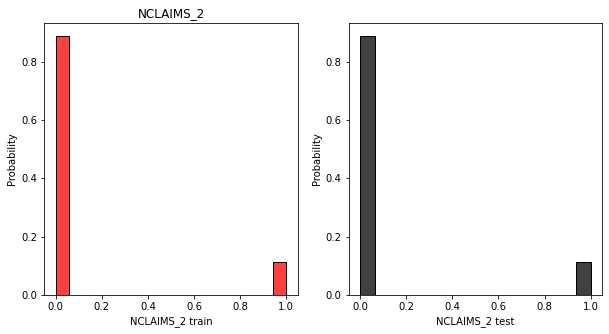

In [9]:
np.random.seed(123)

mtpl_python_X = mtpl_python.drop(labels=['NCLAIMS','NCLAIMS_2'], axis=1) 
mtpl_python_X_train, mtpl_python_X_test, mtpl_python_y_train, mtpl_python_y_test = train_test_split(mtpl_python_X,mtpl_python.NCLAIMS_2, test_size=0.2, stratify=mtpl_python.NCLAIMS_2)

df = pd.DataFrame(mtpl_python_y_train)
df1 = pd.DataFrame(mtpl_python_y_test)

plot_pd = pd.concat([df,df1], ignore_index=True, axis=1)

#rename columns for x-label
plot_pd.columns = ['NCLAIMS_2 train', 'NCLAIMS_2 test']

#plot 

fig, axs = plt.subplots(ncols=2, figsize=(10,5));
sb.histplot(plot_pd ['NCLAIMS_2 train'], ax = axs[0], color='r',stat="probability").set(title='NCLAIMS_2');
sb.histplot(plot_pd['NCLAIMS_2 test'], ax = axs[1], color='k',stat="probability");
plt.show()

We select the set of explanatory variables and we transform the categorical variables into dummy variables. This is required by the classification and regression functions of sklearn which will be used afterwards.

In [10]:
X_train=mtpl_python_X_train[['COVERAGE','FUEL','FLEET','SEX','AGEPH','AGEC','POWER']]
y_train=mtpl_python_y_train

X_train_bis=pd.get_dummies(data=X_train,drop_first=True)


X_test=mtpl_python_X_test[['COVERAGE','FUEL','FLEET','SEX','AGEPH','AGEC','POWER']]
y_test=mtpl_python_y_test
X_test_bis=pd.get_dummies(data=X_test,drop_first=True)

X_train_bis.head()


,AGEPH,AGEC,POWER,COVERAGE_PO,COVERAGE_TPL,FUEL_gasoline,FLEET_Y,SEX_male
53953,32,12,39,0,1,0,0,1
1229,50,7,51,0,1,1,0,1
5331,52,7,64,0,1,1,0,1
89515,46,9,43,0,1,1,0,1
11412,64,2,90,1,0,1,0,1


**Warning :** It could be required to first create the dummy variables and then only split between training/test set. Indeed, if some modalities are not represented in the test set the dummy version of the test set will contain less columns as the training set. This could lead to errors when trying to make predictions on the test set.

### 3.2.1 Simple Tree

We can fit a simple tree with the `DecisionTreeClassifier()` function from sklearn. 

In [11]:
class_tree = tree.DecisionTreeClassifier(criterion = 'gini',
                                         max_depth = 2,
                                        )
a = class_tree.fit(X_train_bis,y_train)



We can then access the values of the tree : 

In [12]:
a.tree_.value

array([[[115948.,  14636.]],

       [[ 13856.,   2757.]],

       [[  5379.,   1236.]],

       [[  8477.,   1521.]],

       [[102092.,  11879.]],

       [[ 71530.,   8971.]],

       [[ 30562.,   2908.]]])

Each pair of element gives the number of observation in class 0 and class 1 in a given node. 

We can also plot the tree : 

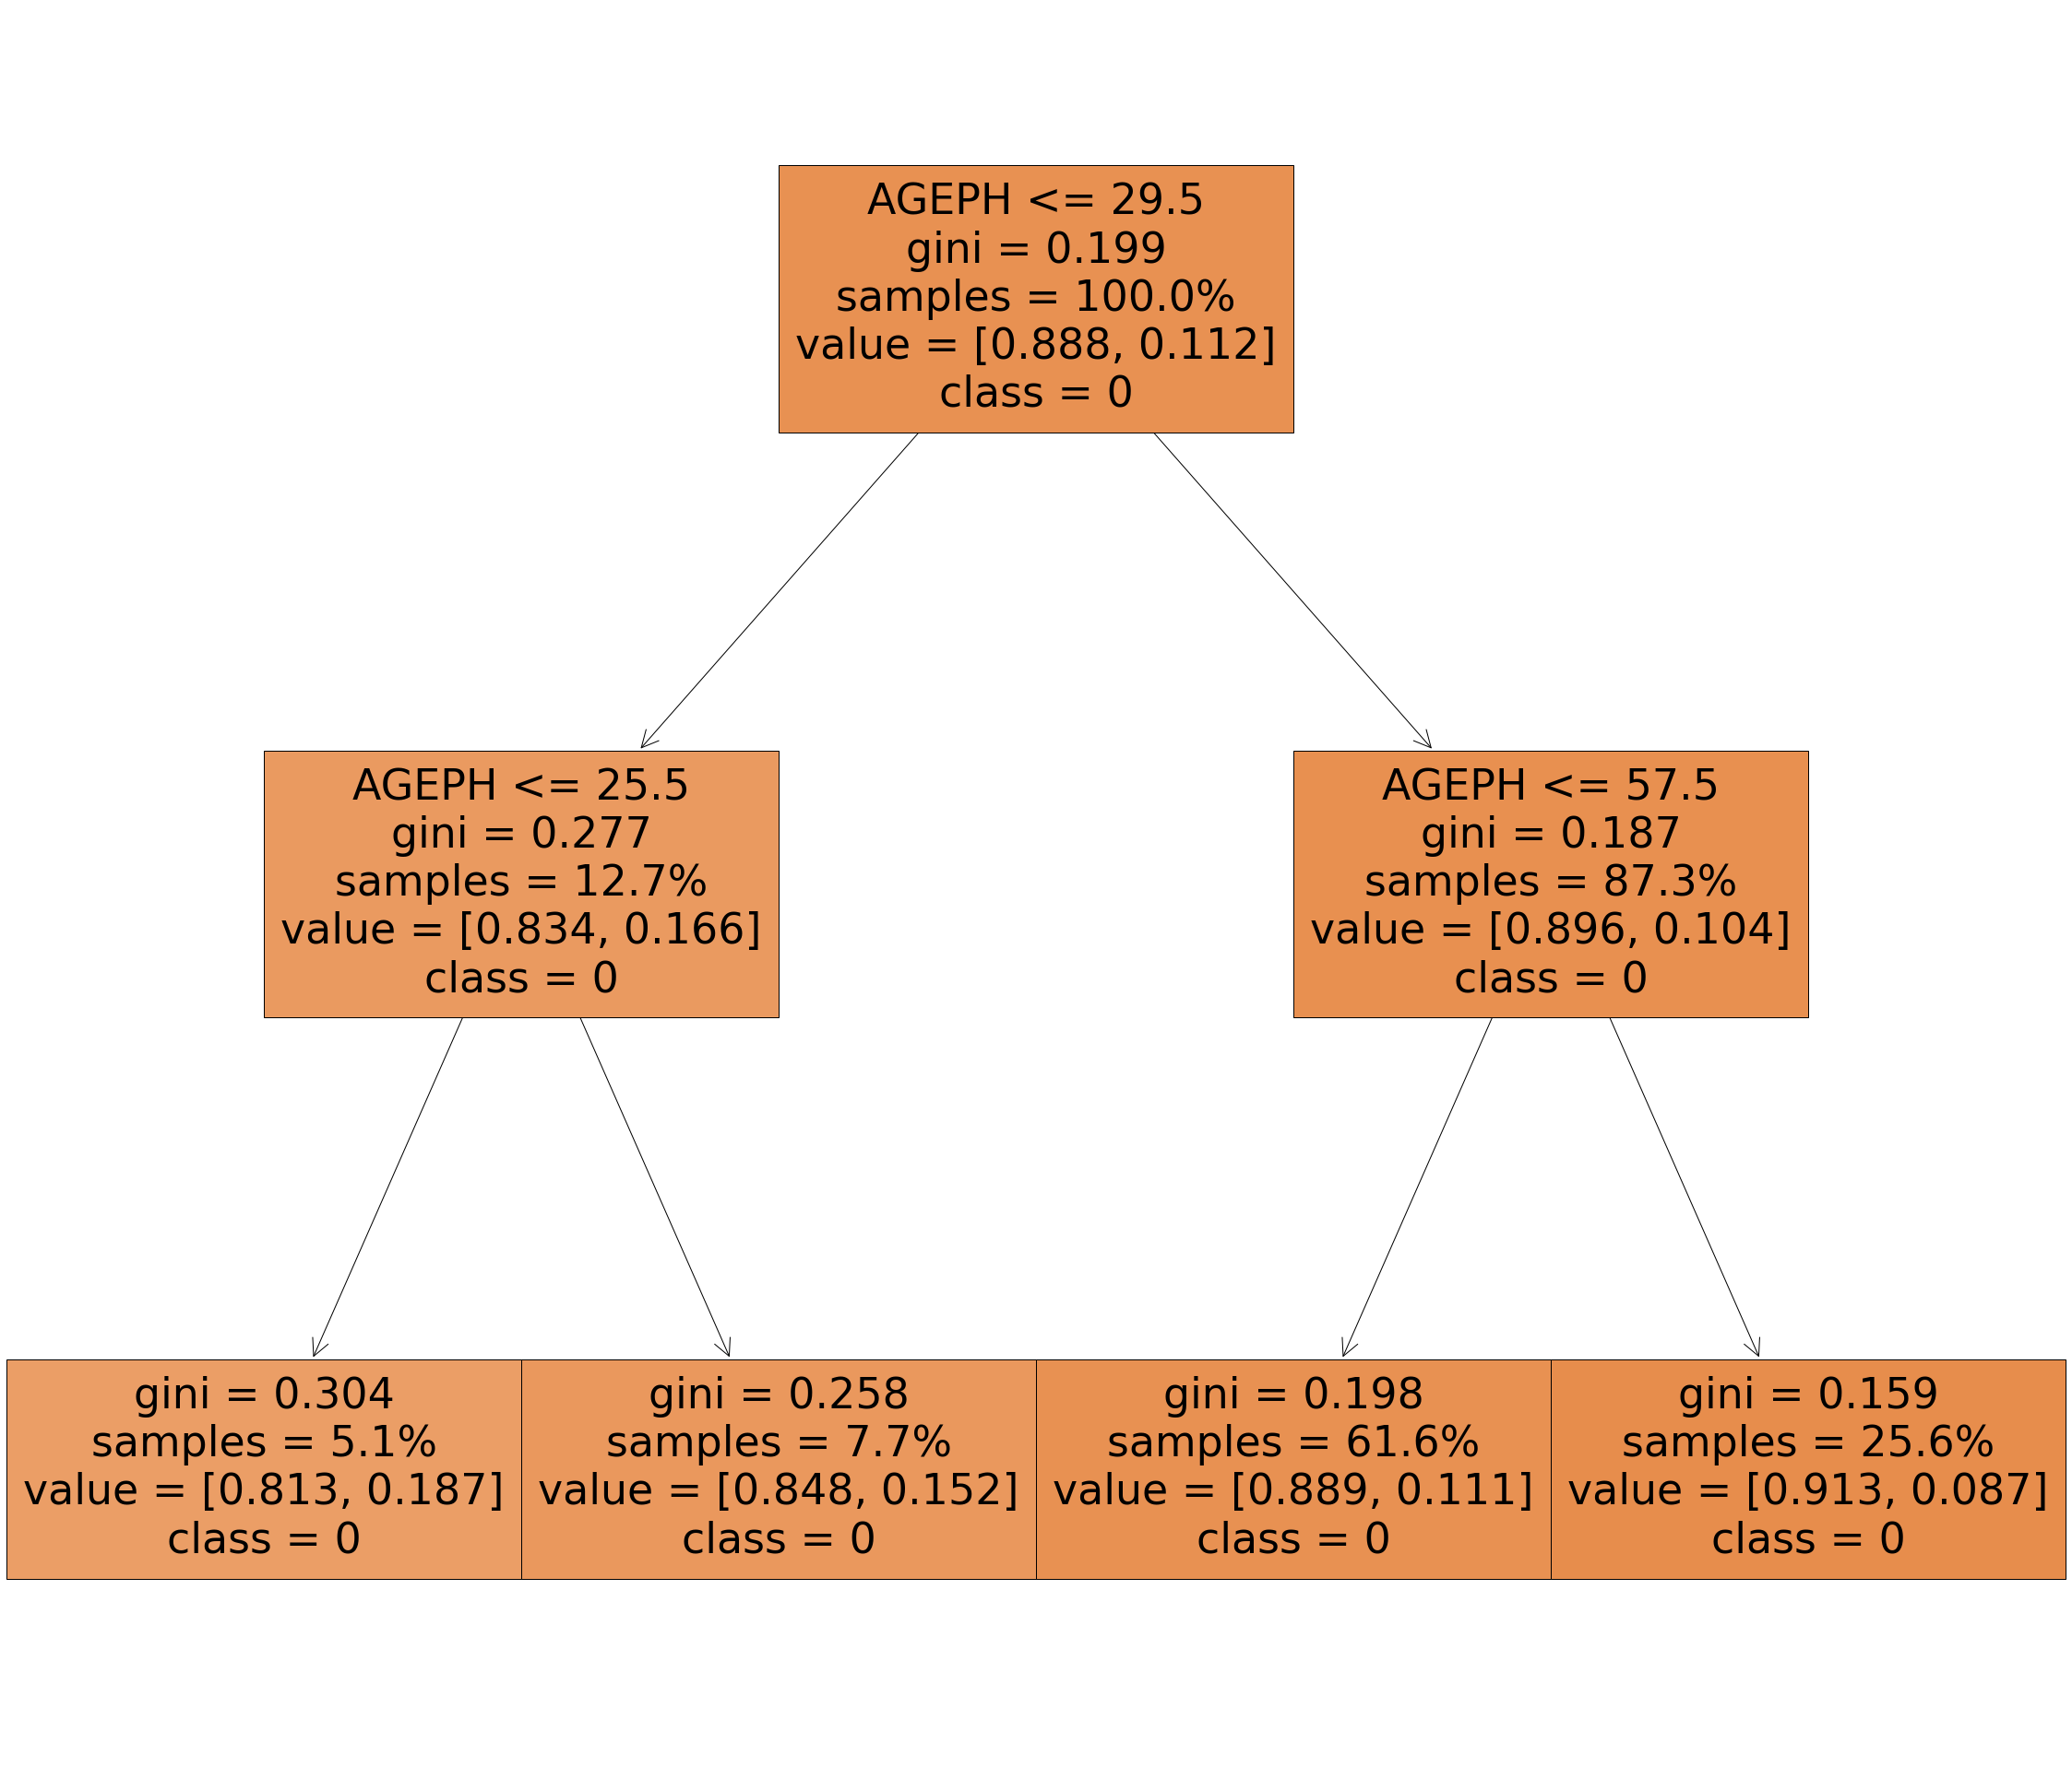

In [13]:
fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(class_tree, 
                   feature_names=X_train_bis.columns,  
                   class_names=['0','1'],
                   filled=True,
                proportion=True)

Each node (= box) of this tree represents a segment of the covariate space (the explanatory variables space) and contains the following information : 

- gini = the Gini index measuring the quality of the prediction in that node
- samples = the % of the total dataset in that node
- value = the % of the node data across the different possible classes
- class = the prediction of the class for that segment = the most represented class in the node

If the node is further splitted it also describes this split. For instance the first node provides the following information : 

- AGEPH <= 29.5

which means this first node will be split into a left node corresponding to a segment where the variable AGEPH takes value <= 29.5 and a right node where the variable AGEPH takes values > 29.5. The split is always described by a spliting condition on a given variable at a given value. The node at the left always satisfies the condition. 

The nodes at the end correspond to the final segmentation of the covariate space and are called leaves. The final predictions of the tree correspond to the class written in each of those final boxes. In order to know the segment corresponding to a final node we have to apply the different splitting conditions of the tree leading from the first node to this final node.

For instance, the leaf (end node) at the bottom left corresponds to the segment AGEPH <= 25,5 for which the prediction is the class 0 (meaning 0 claims). This is because in this final node 81.3% of the observations have 0 claims and the most frequent class gives the prediction.

We see that this tree is not big enough in order to be able to predict non 0 claims (which are highly dominant in the dataset).

### 3.2.2 Loss functions

Generally when fitting a classification tree the objective is to minimize one of the following loss functions : 

- Missclassification index
- Gini index
- Entropy index

In the case of 2 possible classes, p being the probability of being in class 1, those are defined as follow : 

- Missclassification index : $$ 1 - max(p,1-p)$$
- Gini index : $$ p*(1-p) + (1-p)*(1-(1-p))$$
- Entropy index : $$ -p*(log(p)) - (1-p)*(log(1-p)) $$


Let us plot those 3 loss functions : 

<Figure size 432x288 with 0 Axes>

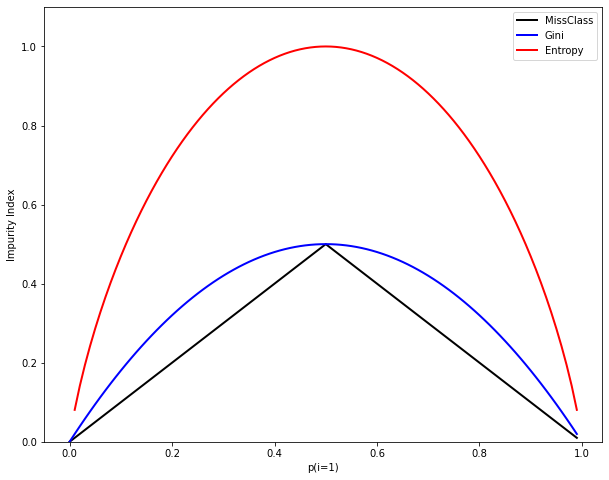

In [14]:
def missclassification_error(p):
    return 1 - np.max([p, 1 - p])

def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

probability = np.arange(0.0, 1.0, 0.01)

missclassification_error_values=[missclassification_error(i) for i in probability]
gini_values=gini(probability)
entropy_values=entropy(probability)

fig = plt.figure()
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

line = ax.plot(probability,missclassification_error_values, label='MissClass',linestyle='-', lw=2, color='black')
line = ax.plot(probability,gini_values, label='Gini',linestyle='-', lw=2, color='blue')
line = ax.plot(probability,entropy_values, label='Entropy',linestyle='-', lw=2, color='red')

ax.legend()
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

As we can see the loss functions are minimized when only a single class is represented in the node. Of course this would lead to overfitting and therefore the size of the tree needs to be controlled. 


### 3.2.2 Overfitting

Overfitting occurs when the only criteria is the minimization of the loss function over the training data set. When doing so the tree will grow until each node contains only a single observation. It is clear such kind of tree will not generalize well to new data.

Controlling overfitting means controlling the size of the tree. Let us see the different arguments of the sklearn Decision tree function impacting the size of the tree. We will later on see how we can select the optimal size of a tree in order to optimize the predictions on new data.

The first parameter allowing to control the size of the tree is the **max_depth** parameter : 


Setting **max_depth = 1** will generate a tree with at most depth 1 (so at most 1 split / 2 nodes)

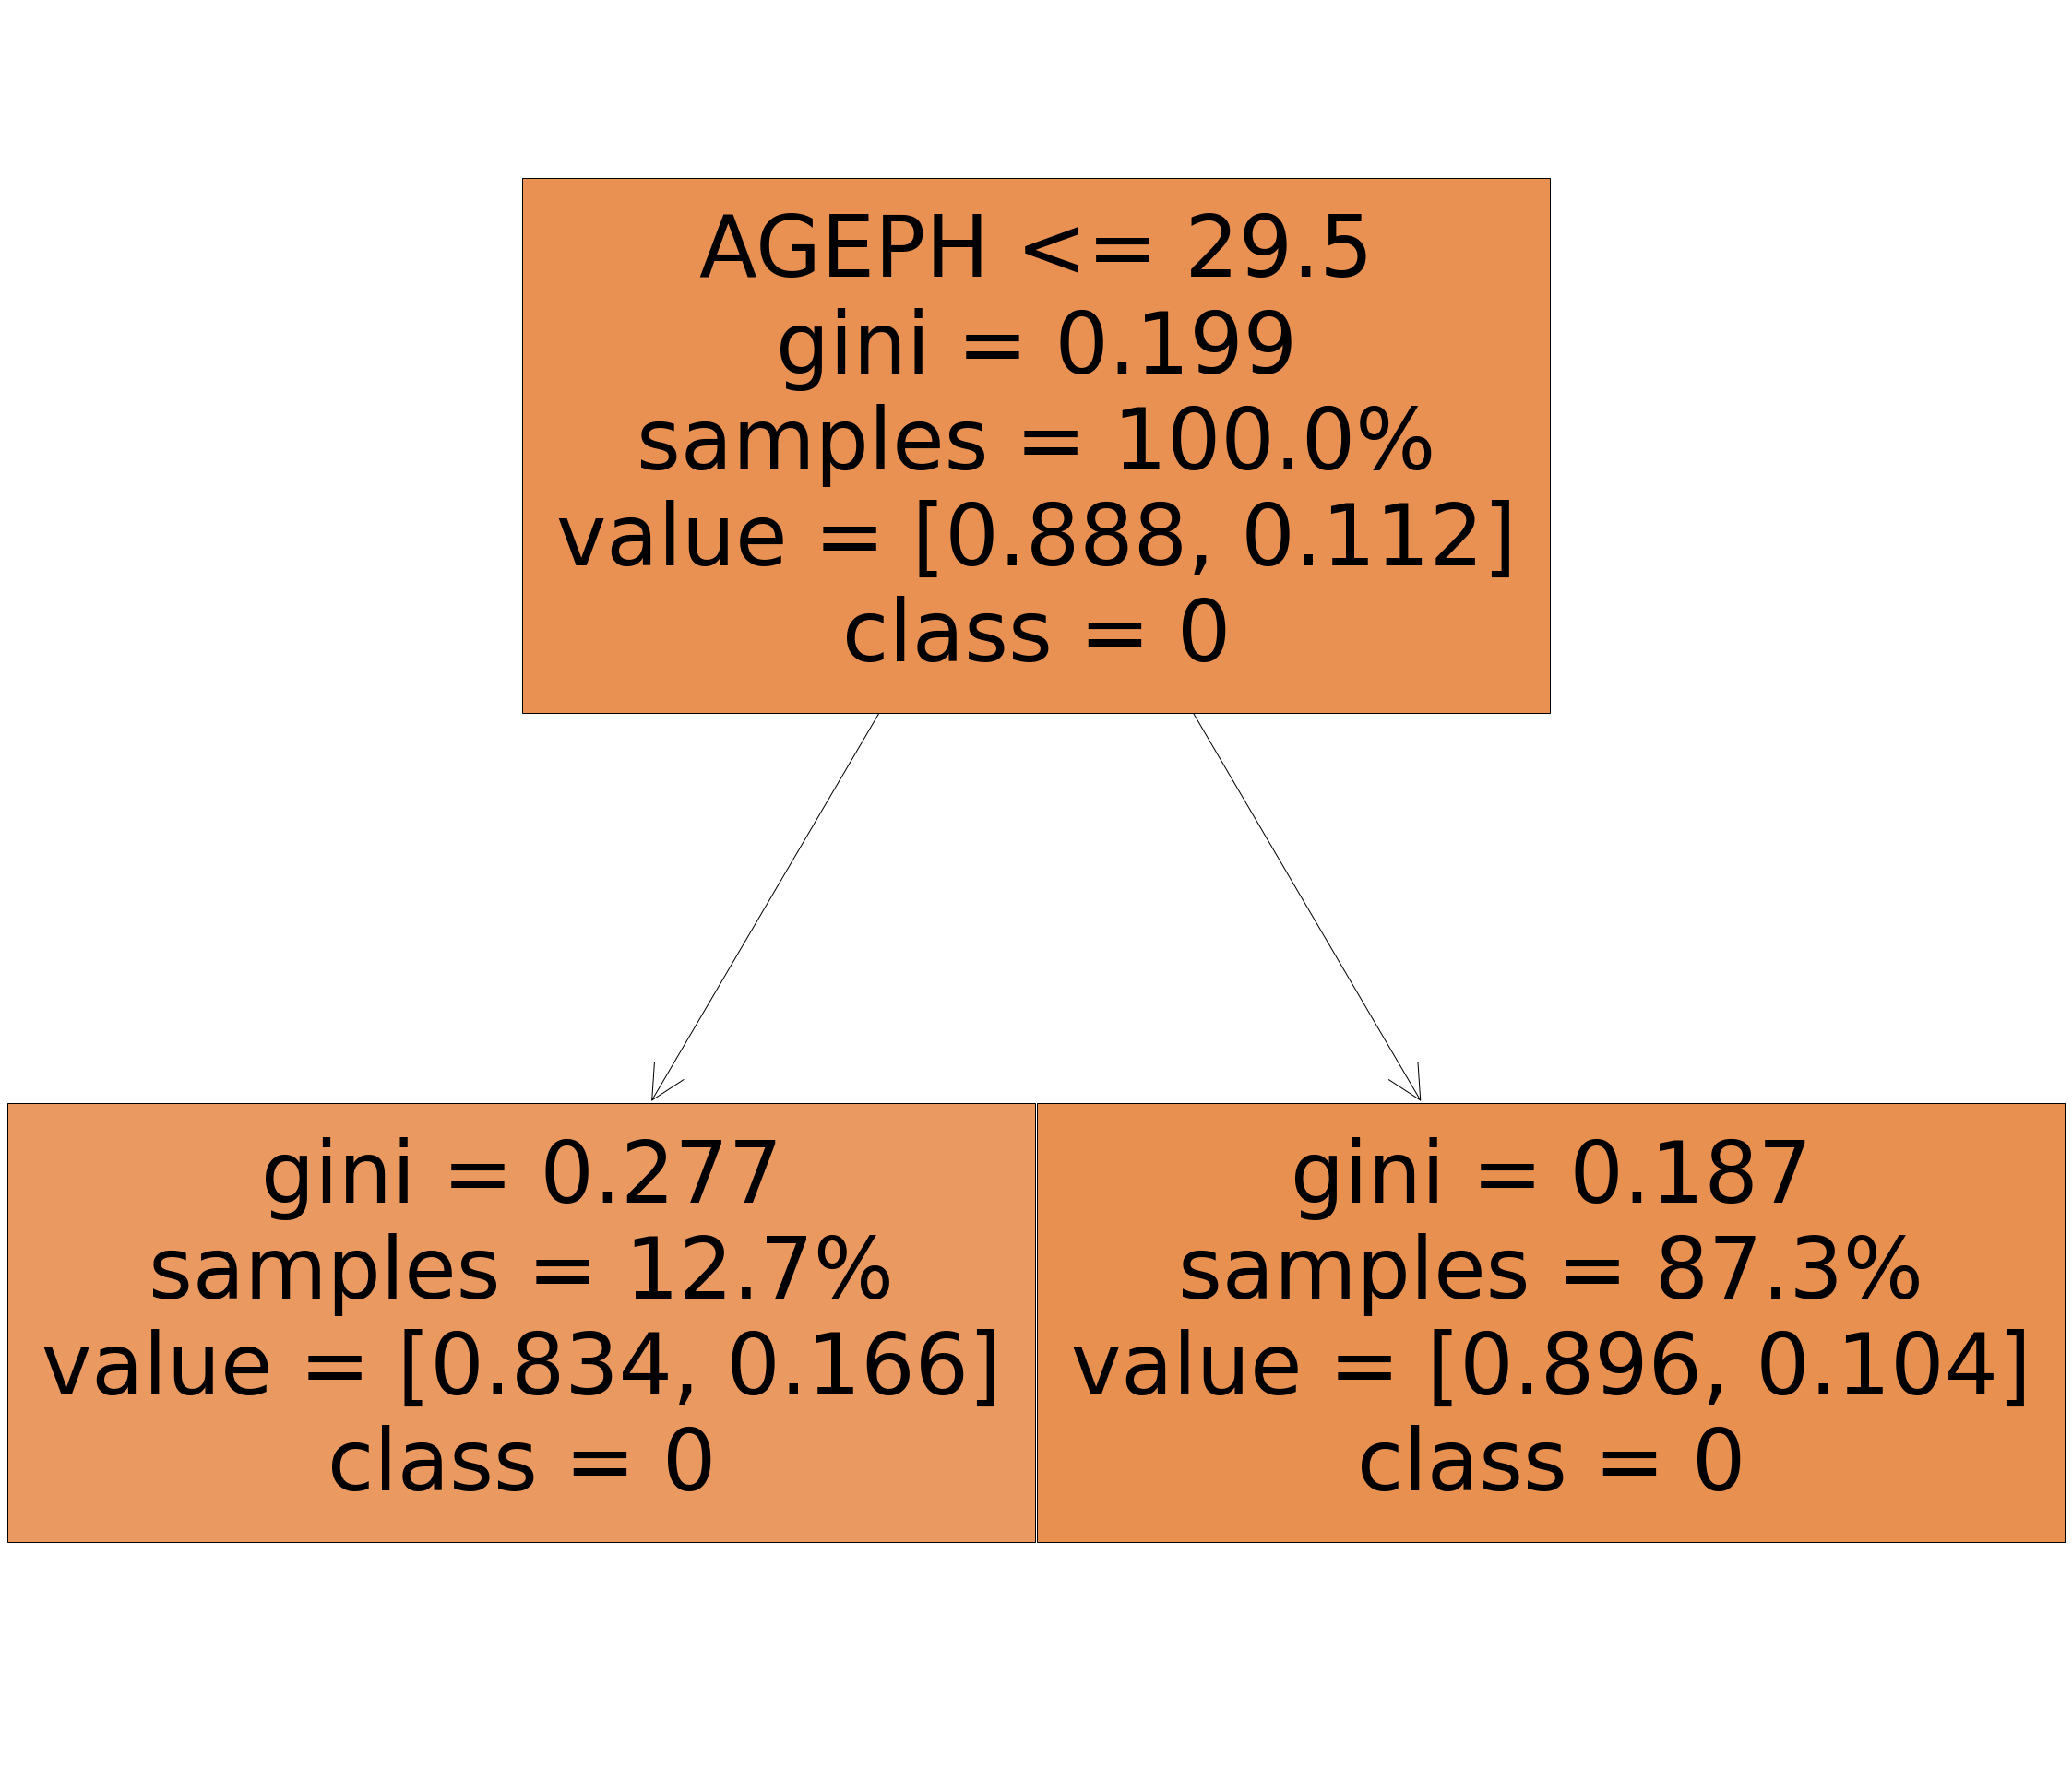

In [15]:
class_tree_temp = tree.DecisionTreeClassifier(criterion = 'gini',
                                         max_depth = 1,
                                        )
class_tree_temp.fit(X_train_bis,y_train)

fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(class_tree_temp, 
                   feature_names=X_train_bis.columns,  
                   class_names=['0','1'],
                   filled=True,
                proportion=True)

If we set **max_depth = 4** we will have a tree with at most a depth 4 (so at most $2^{4} = 16$ leaves) 

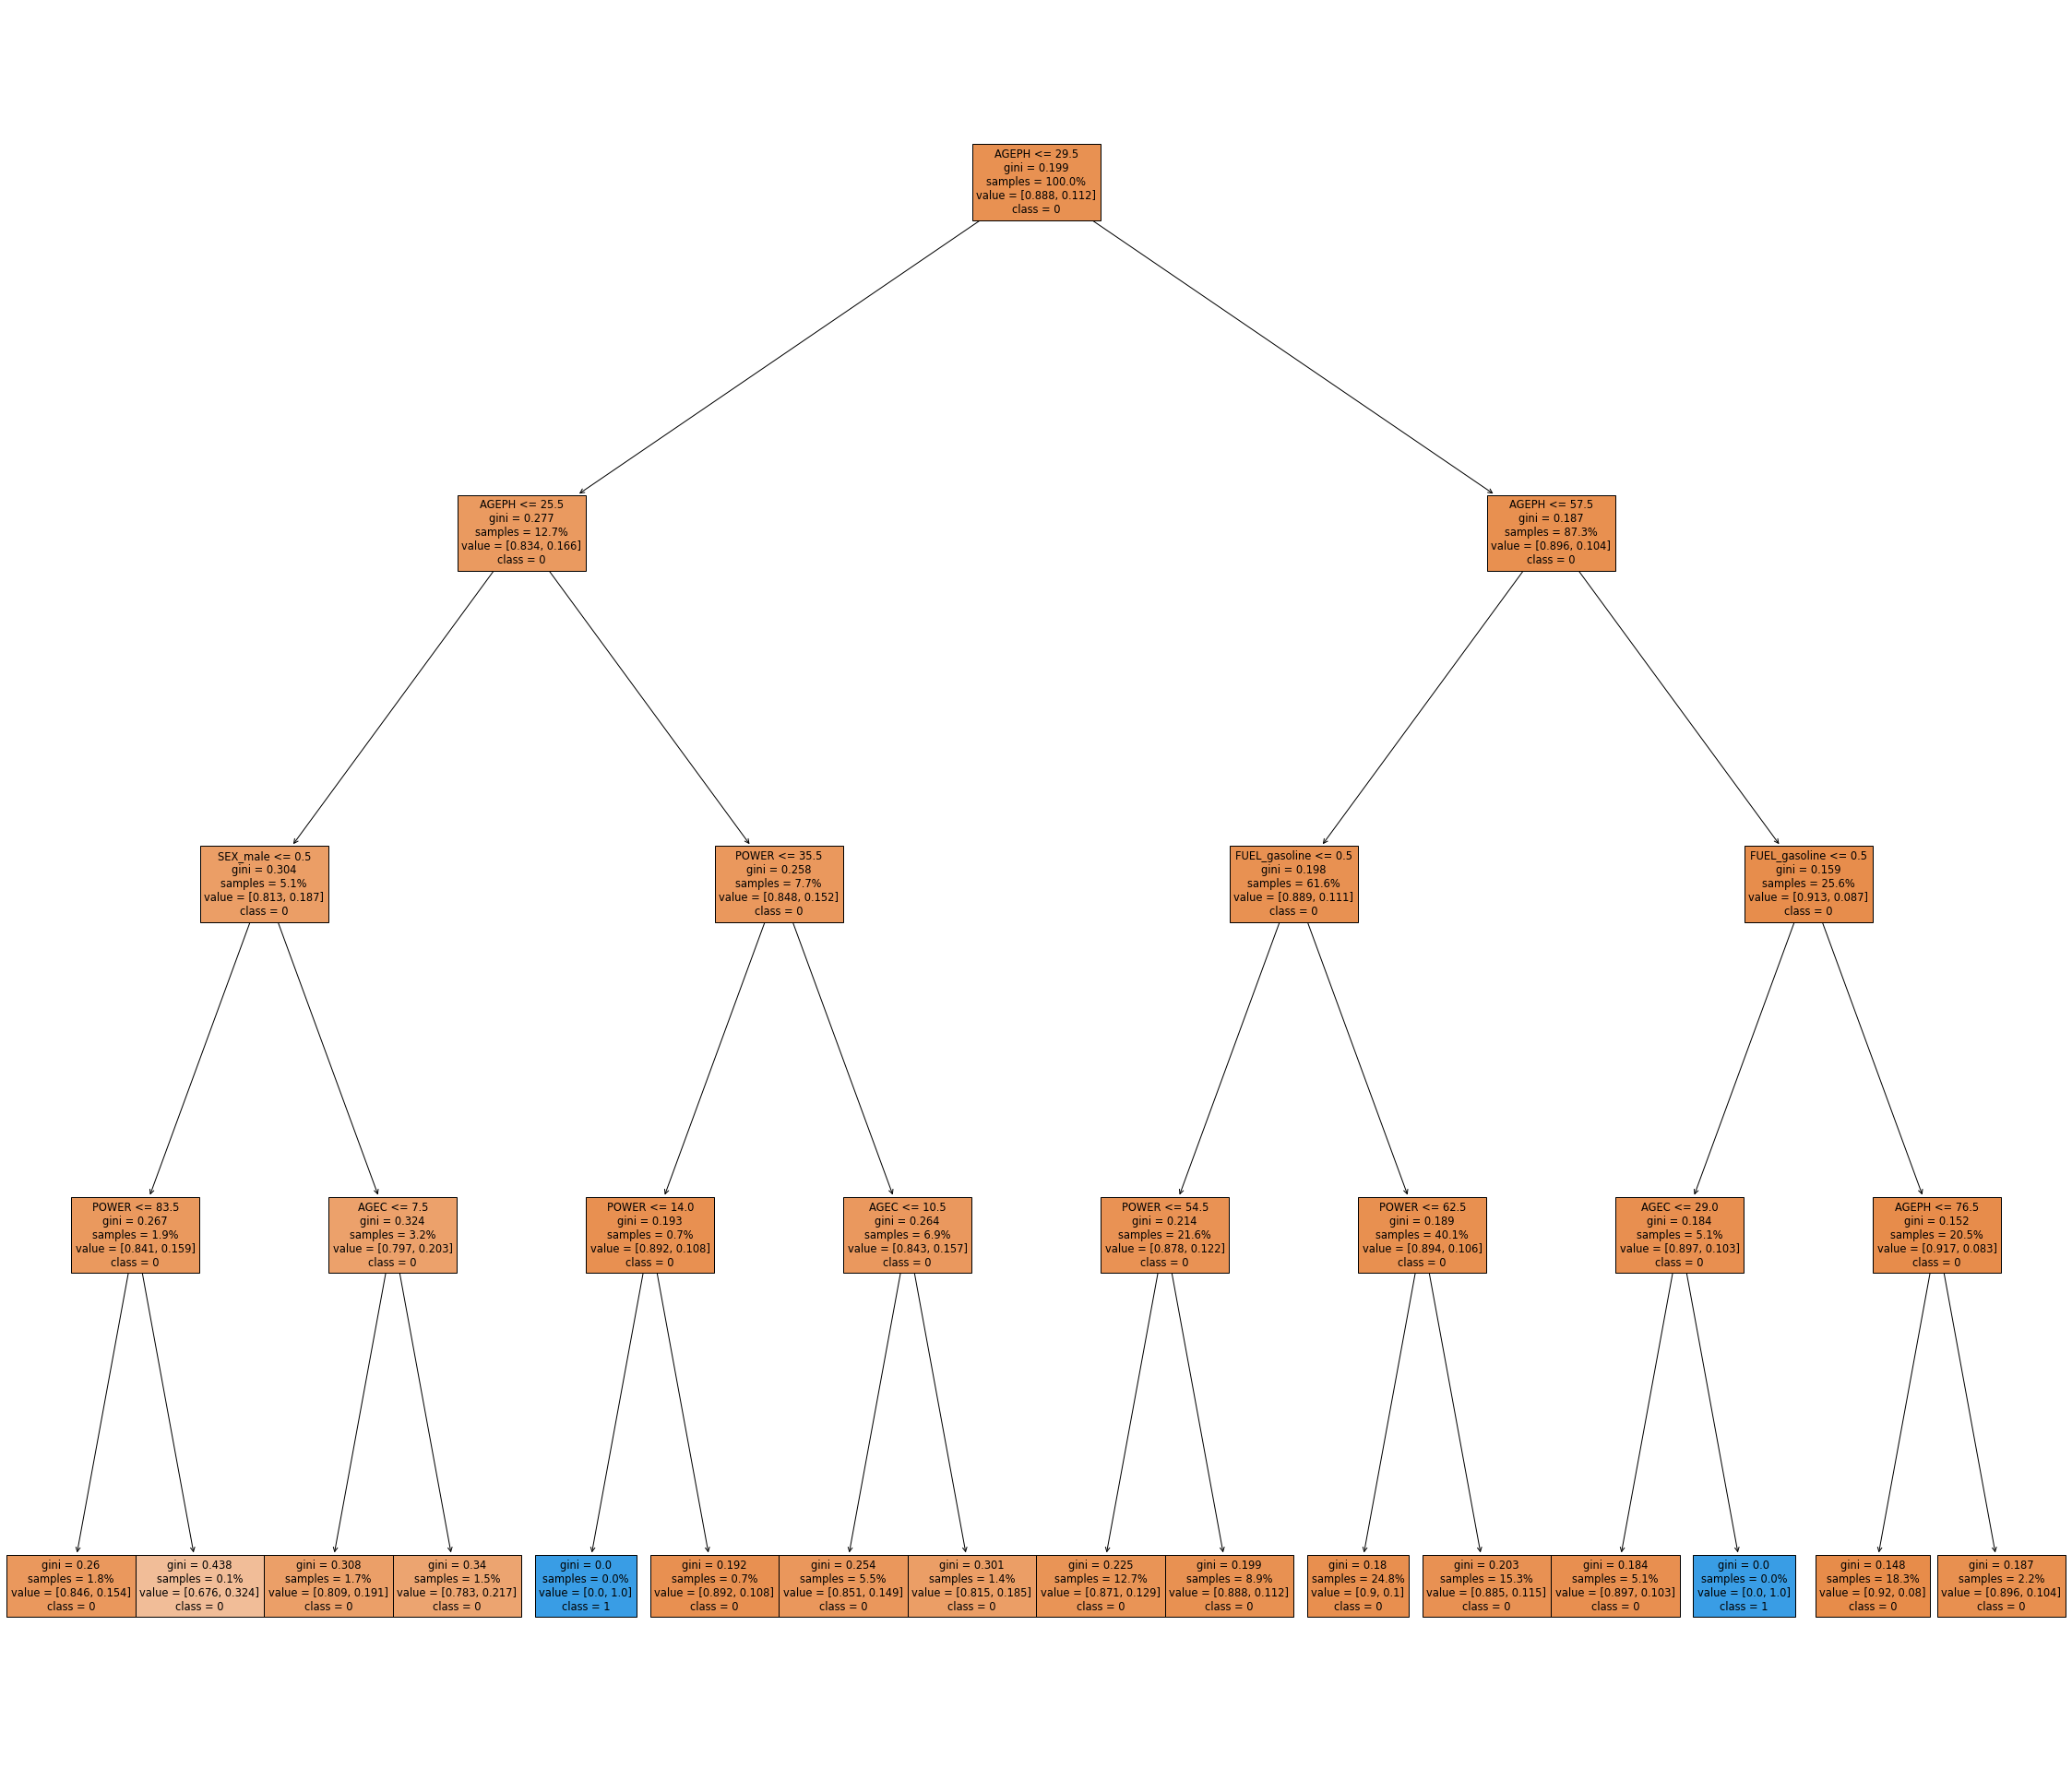

In [16]:
class_tree_temp = tree.DecisionTreeClassifier(criterion = 'gini',
                                         max_depth = 4,
                                        )
class_tree_temp.fit(X_train_bis,y_train)

fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(class_tree_temp, 
                   feature_names=X_train_bis.columns,  
                   class_names=['0','1'],
                   filled=True,
                proportion=True)

We see here that growing the tree allows to get a prediction of 1 claim in 2 segments. 

Another useful parameter controlling the size of the tree is the **min_samples_leaf**. It allows to set a constraint on the minimal size of the final nodes of the tree.

If we set **min_samples_leaf = 0.2** it means that an additional split will only be done if each of the children node contain at least 20% of the dataset.

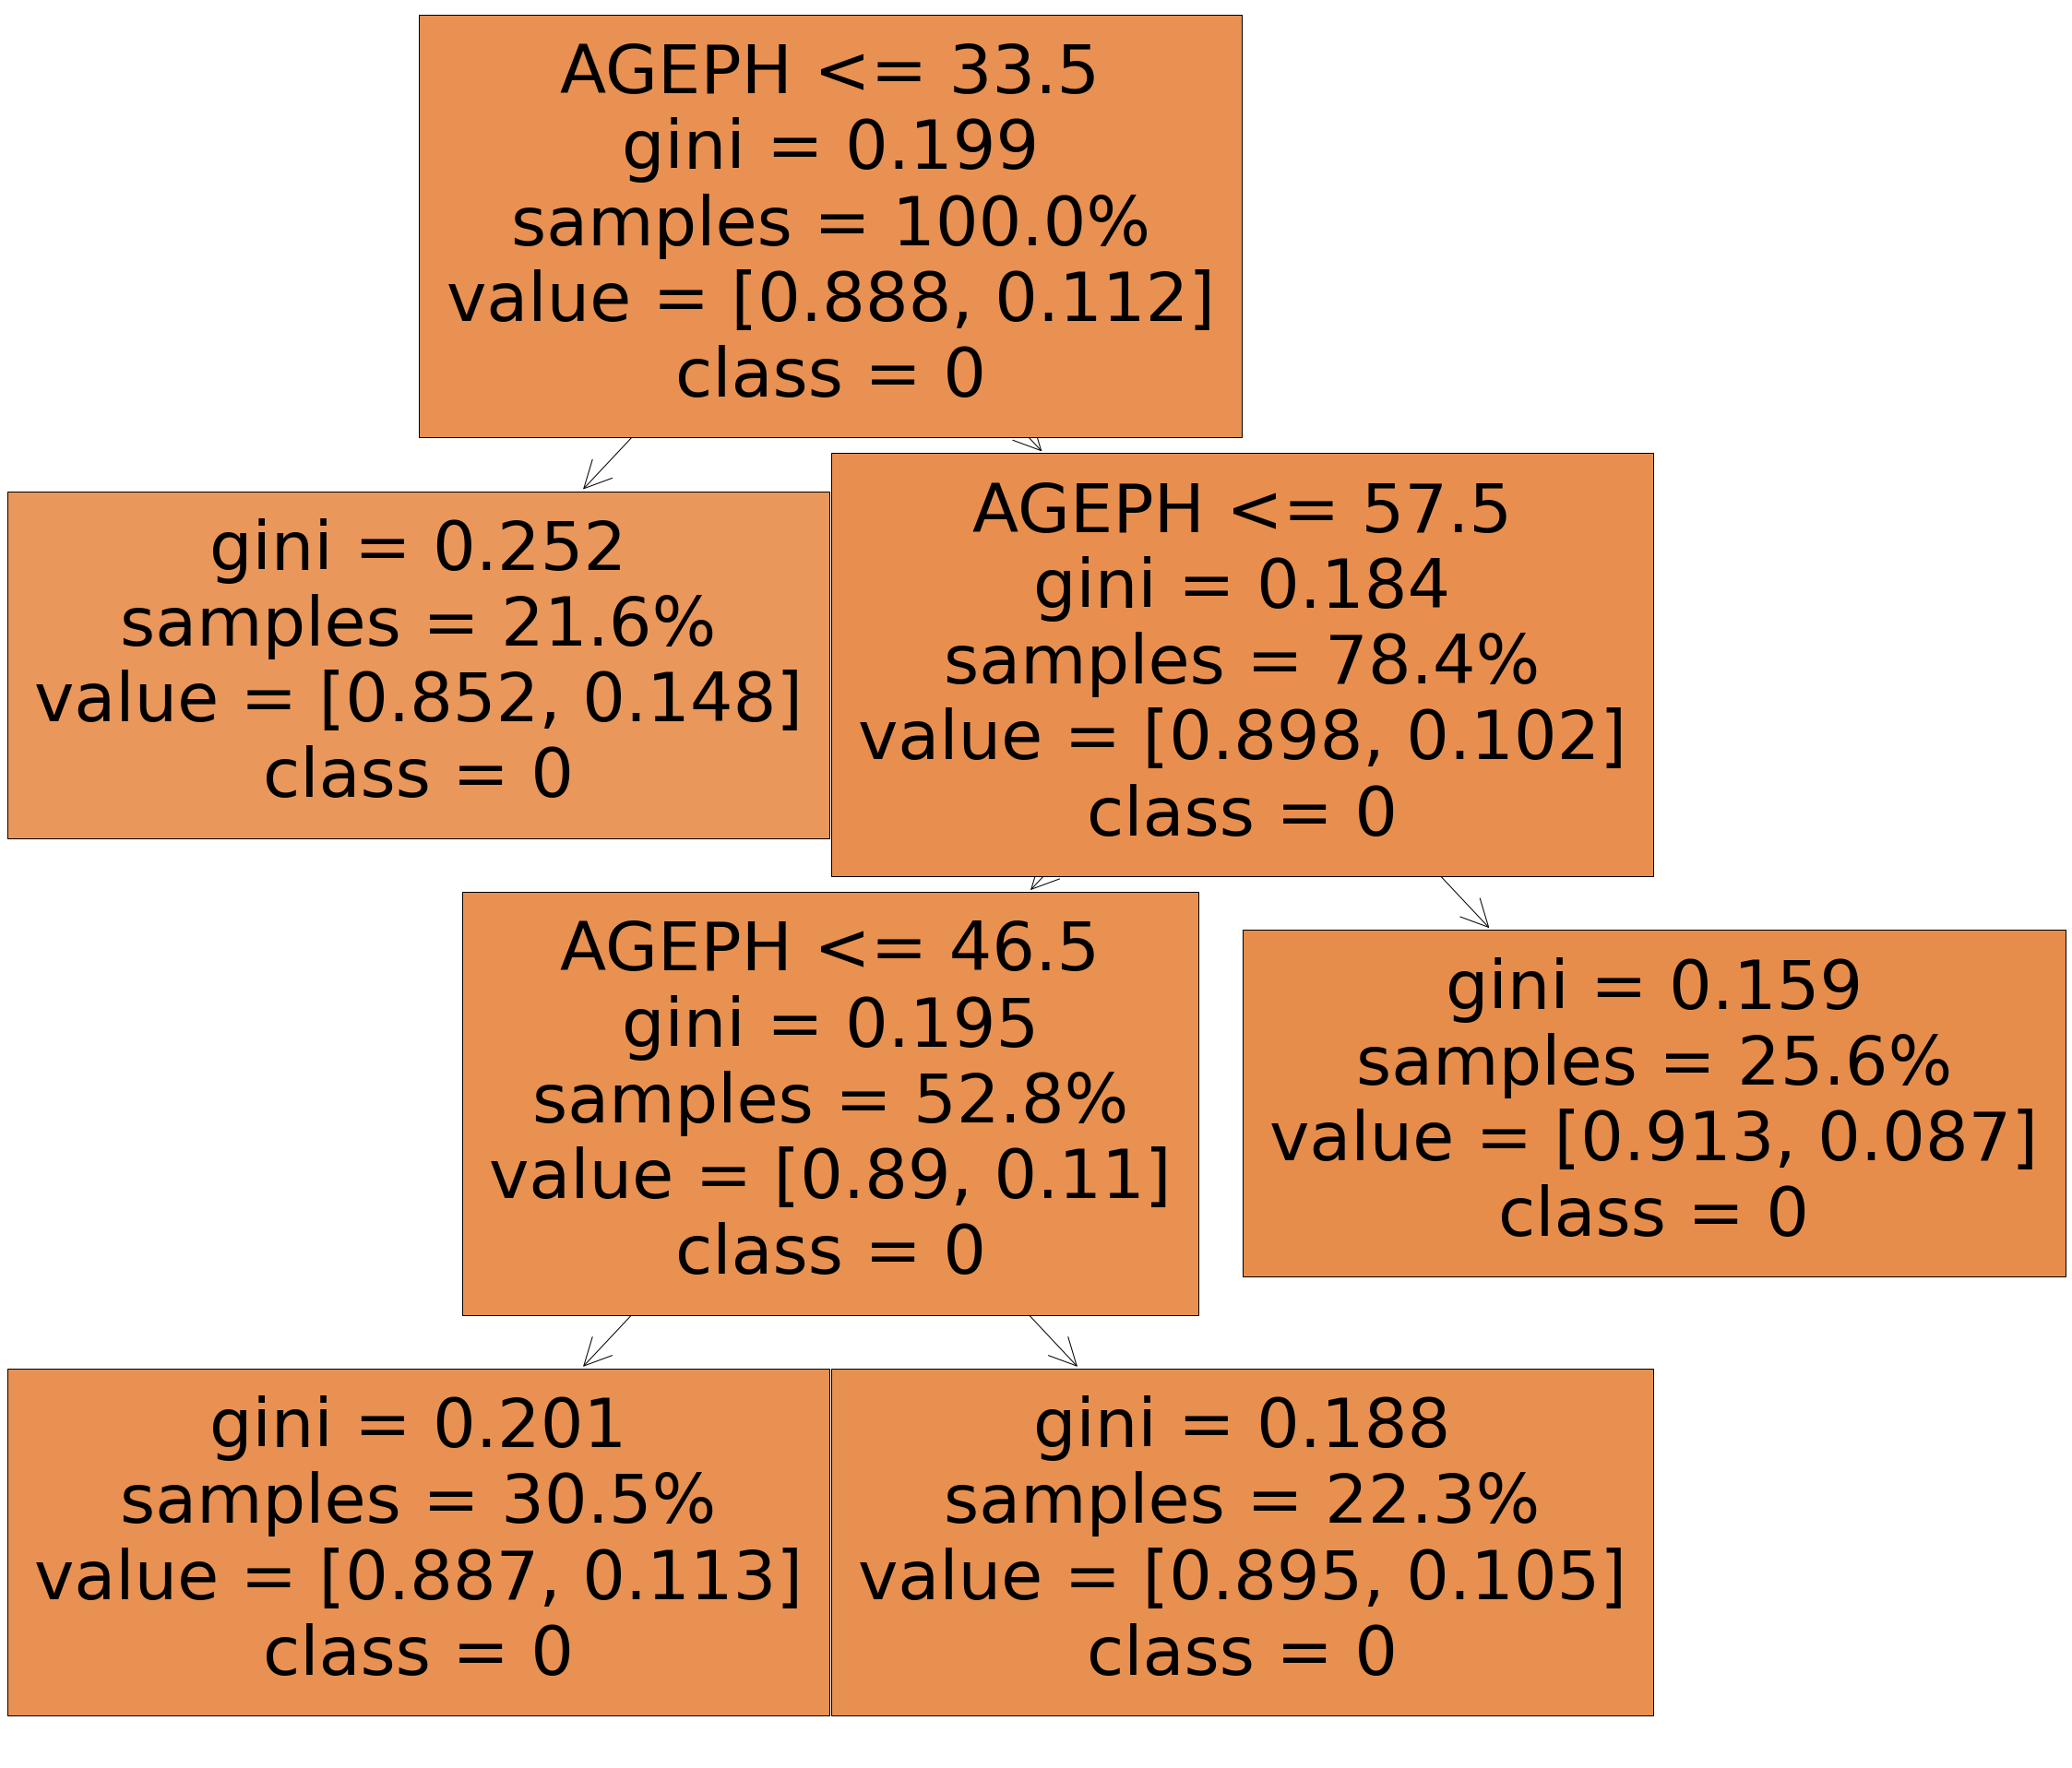

In [17]:
class_tree_temp = tree.DecisionTreeClassifier(criterion = 'gini',
                                         min_samples_leaf = 0.2,
                                        )
class_tree_temp.fit(X_train_bis,y_train)

fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(class_tree_temp, 
                   feature_names=X_train_bis.columns,  
                   class_names=['0','1'],
                   filled=True,
                proportion=True)

Decreasing the **min_samples_leaf** will of course lead to a larger tree : 

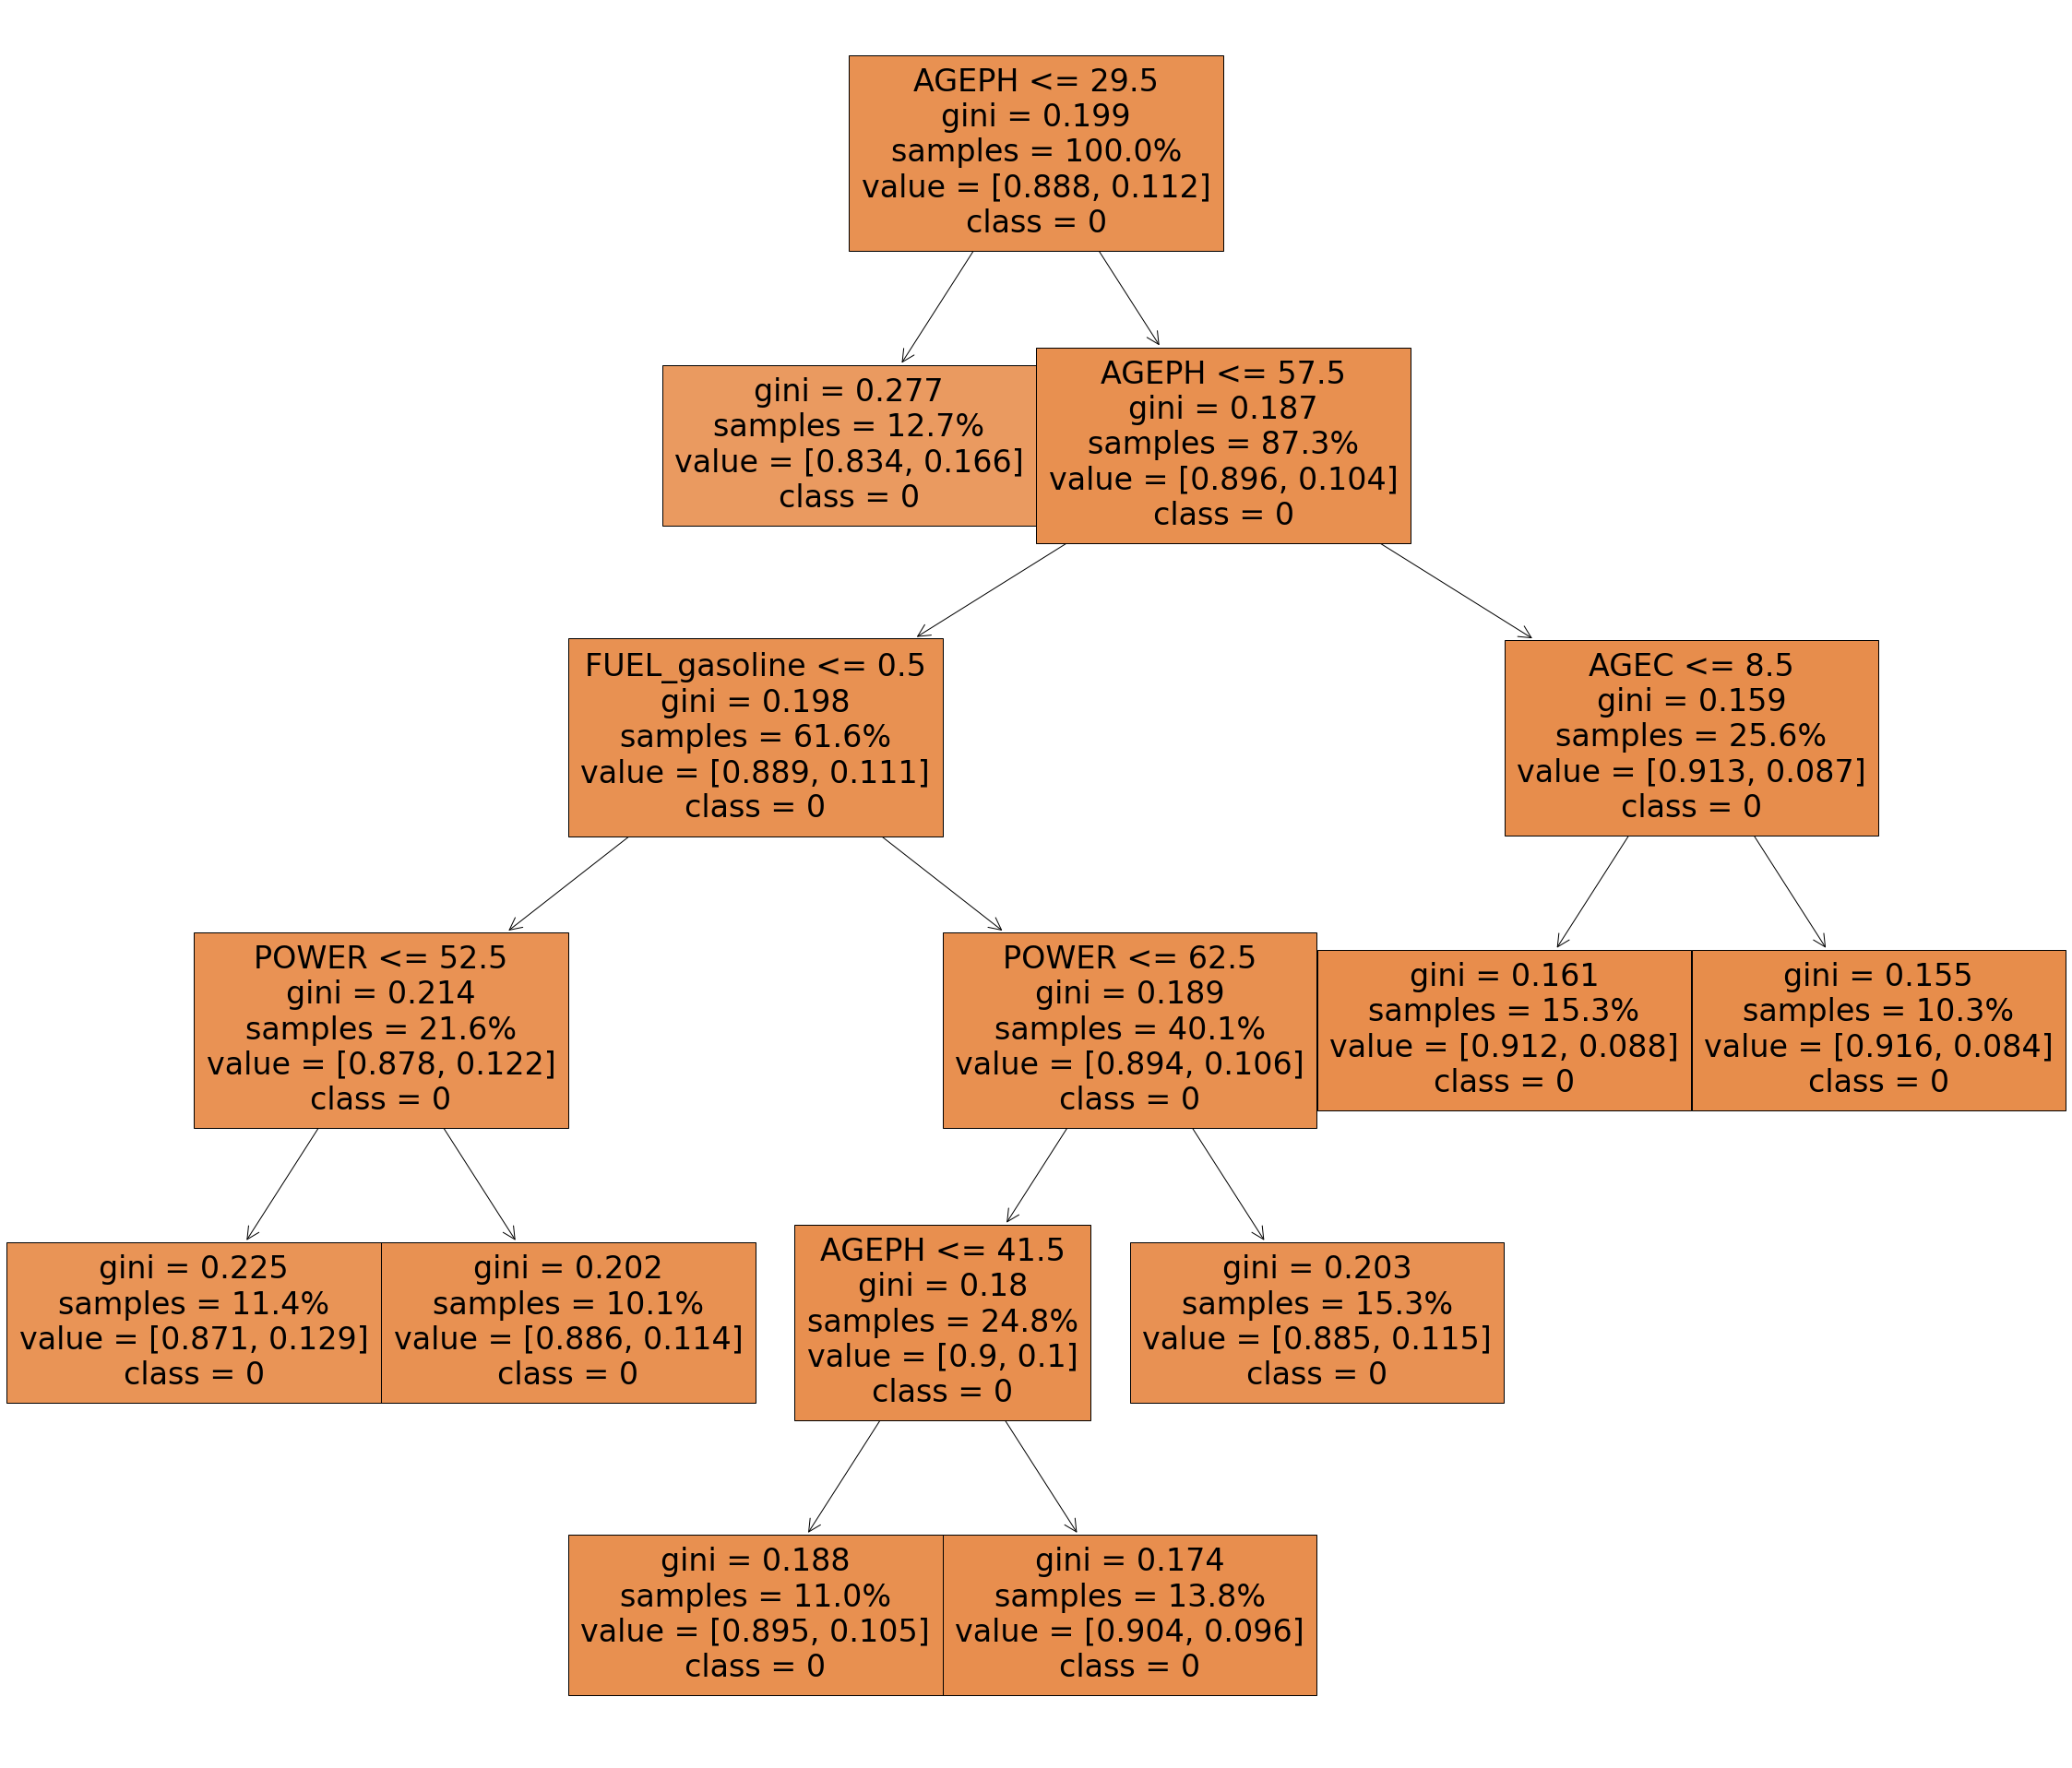

In [18]:
class_tree_temp = tree.DecisionTreeClassifier(criterion = 'gini',
                                         min_samples_leaf = 0.1,
                                        )
class_tree_temp.fit(X_train_bis,y_train)

fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(class_tree_temp, 
                   feature_names=X_train_bis.columns,  
                   class_names=['0','1'],
                   filled=True,
                proportion=True)

A third way we can control the size of the tree is by specifying a cost of complexity parameter $\alpha$. In that case the tree minimizes a penalized loss function : 

$$ L(T)^{*}= L(T) + \alpha |T|$$

It means that each additional split needs to decrease the loss function L(T) by at least $\alpha$. The higher $\alpha$ the smaller the final tree.

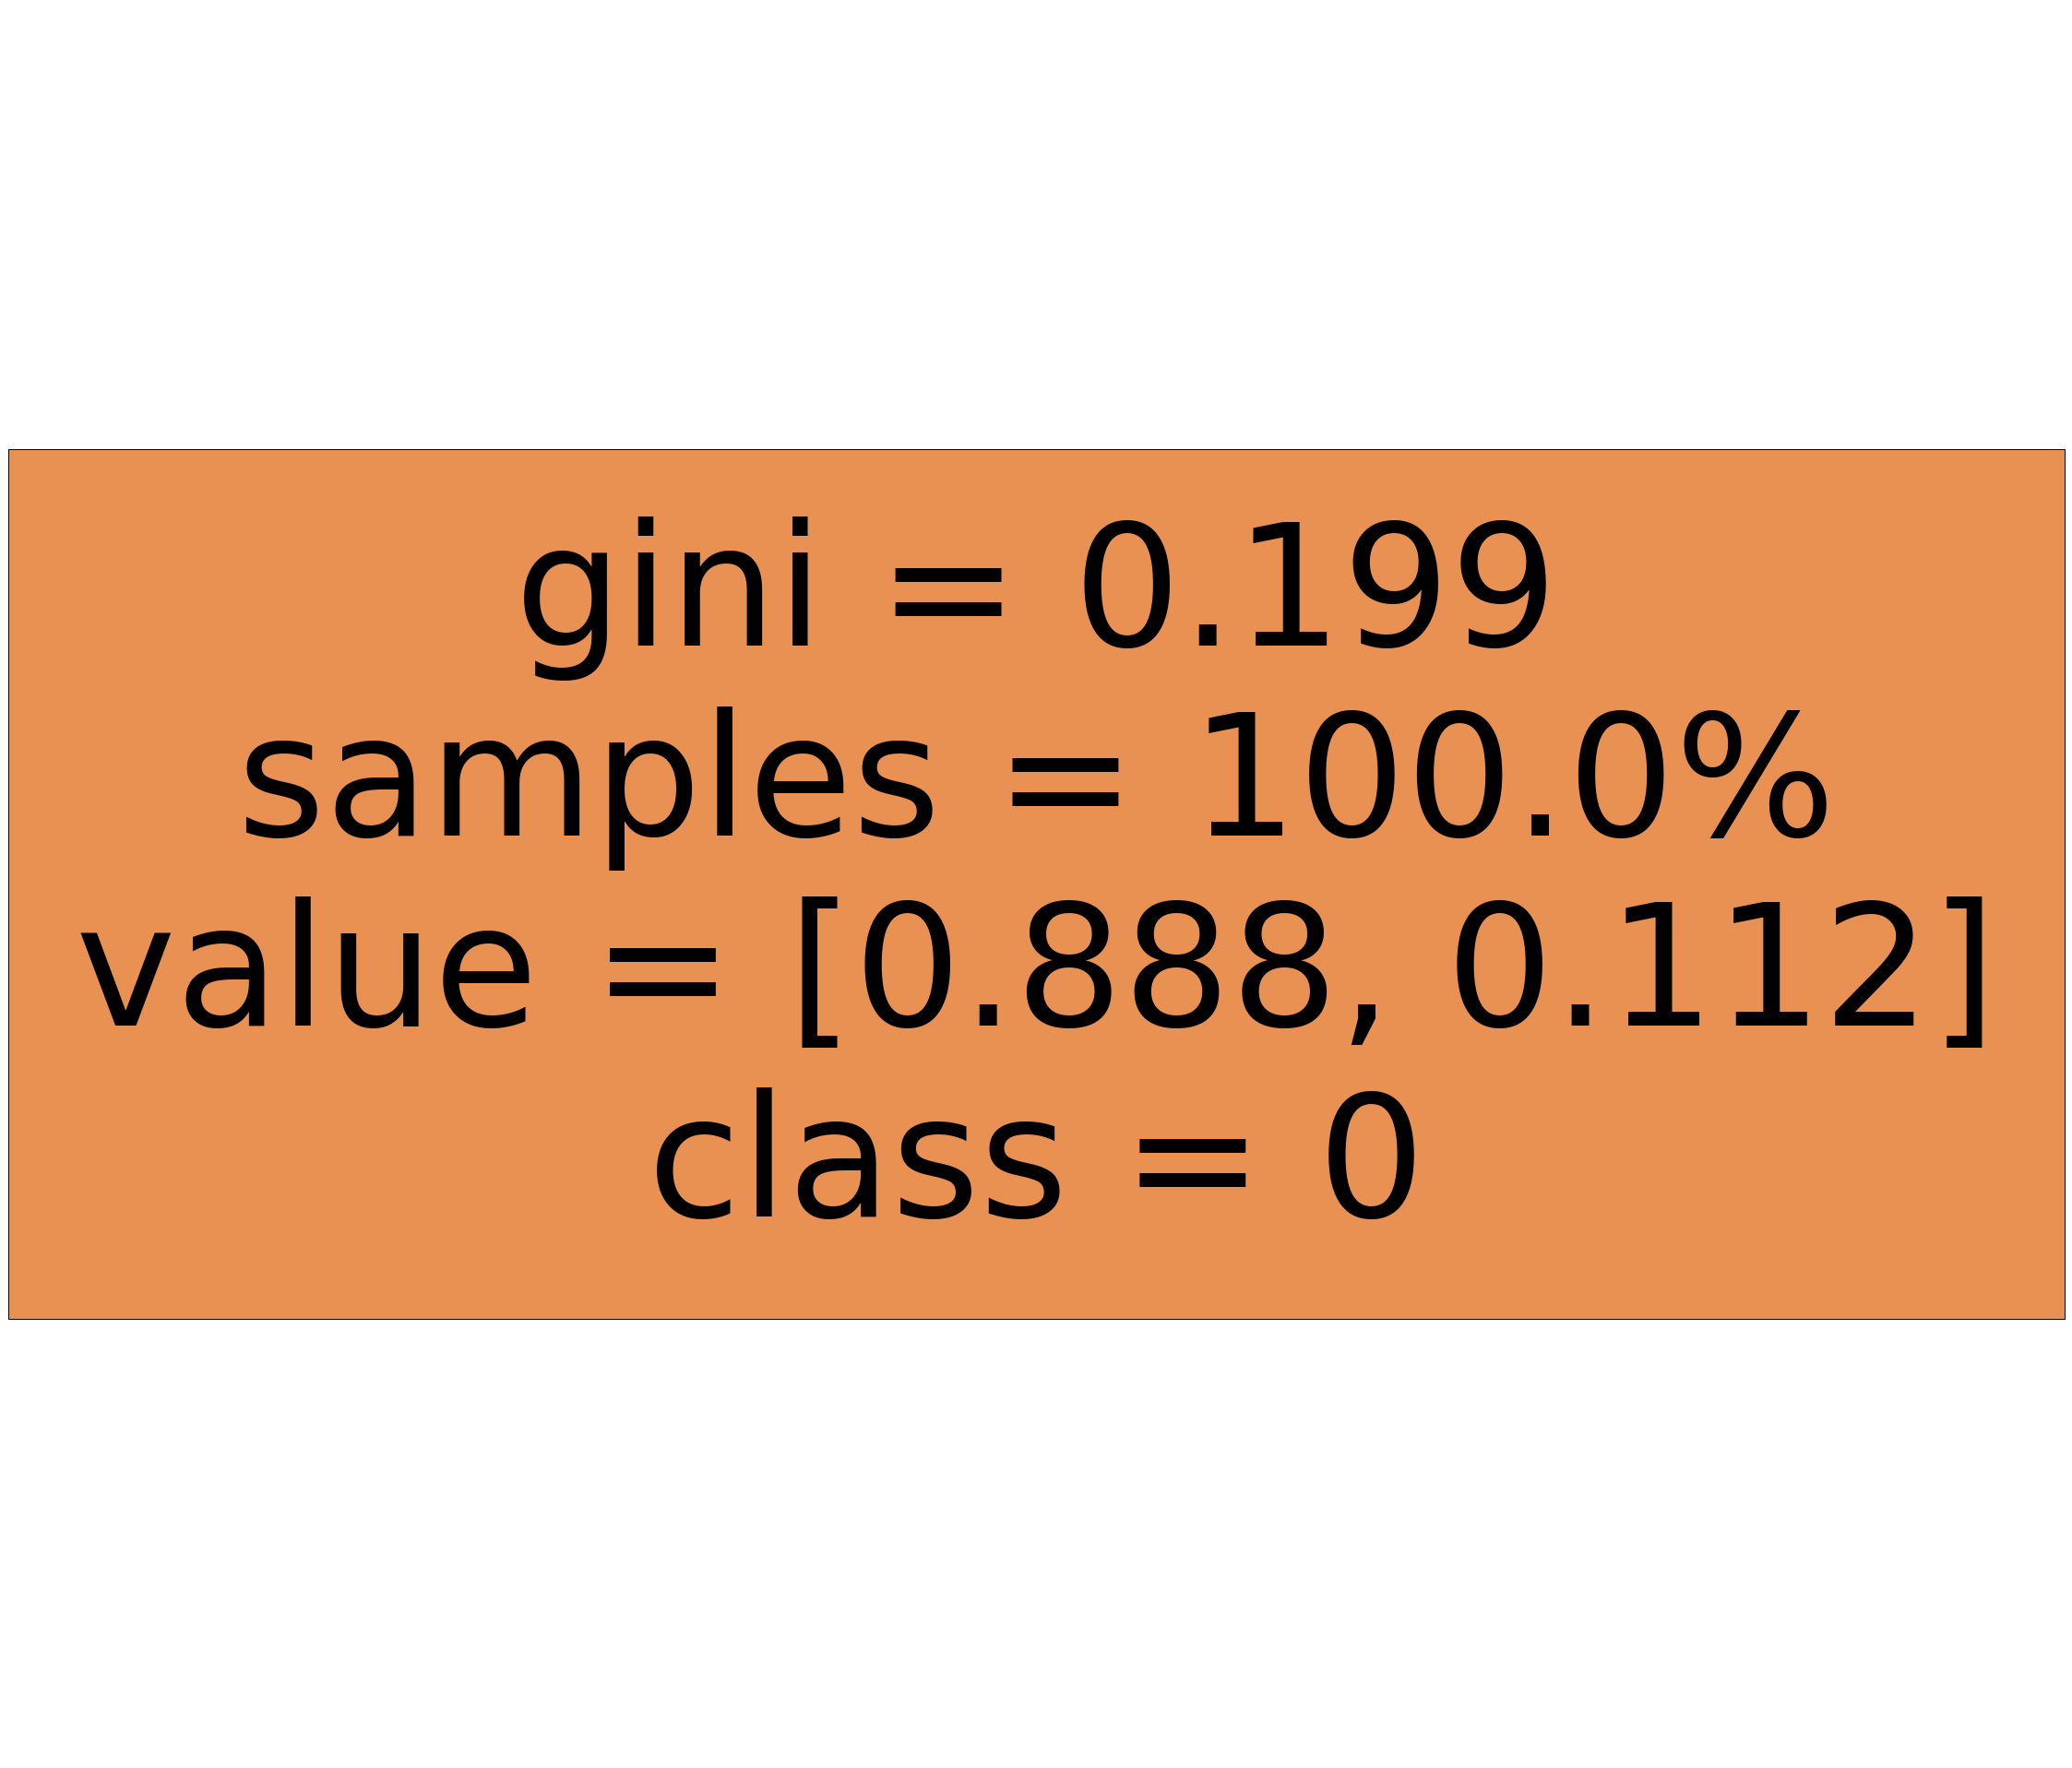

In [19]:
class_tree_temp = tree.DecisionTreeClassifier(criterion = 'gini',
                                         ccp_alpha = 0.1,
                                        )
class_tree_temp.fit(X_train_bis,y_train)

fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(class_tree_temp, 
                   feature_names=X_train_bis.columns,  
                   class_names=['0','1'],
                   filled=True,
                proportion=True)

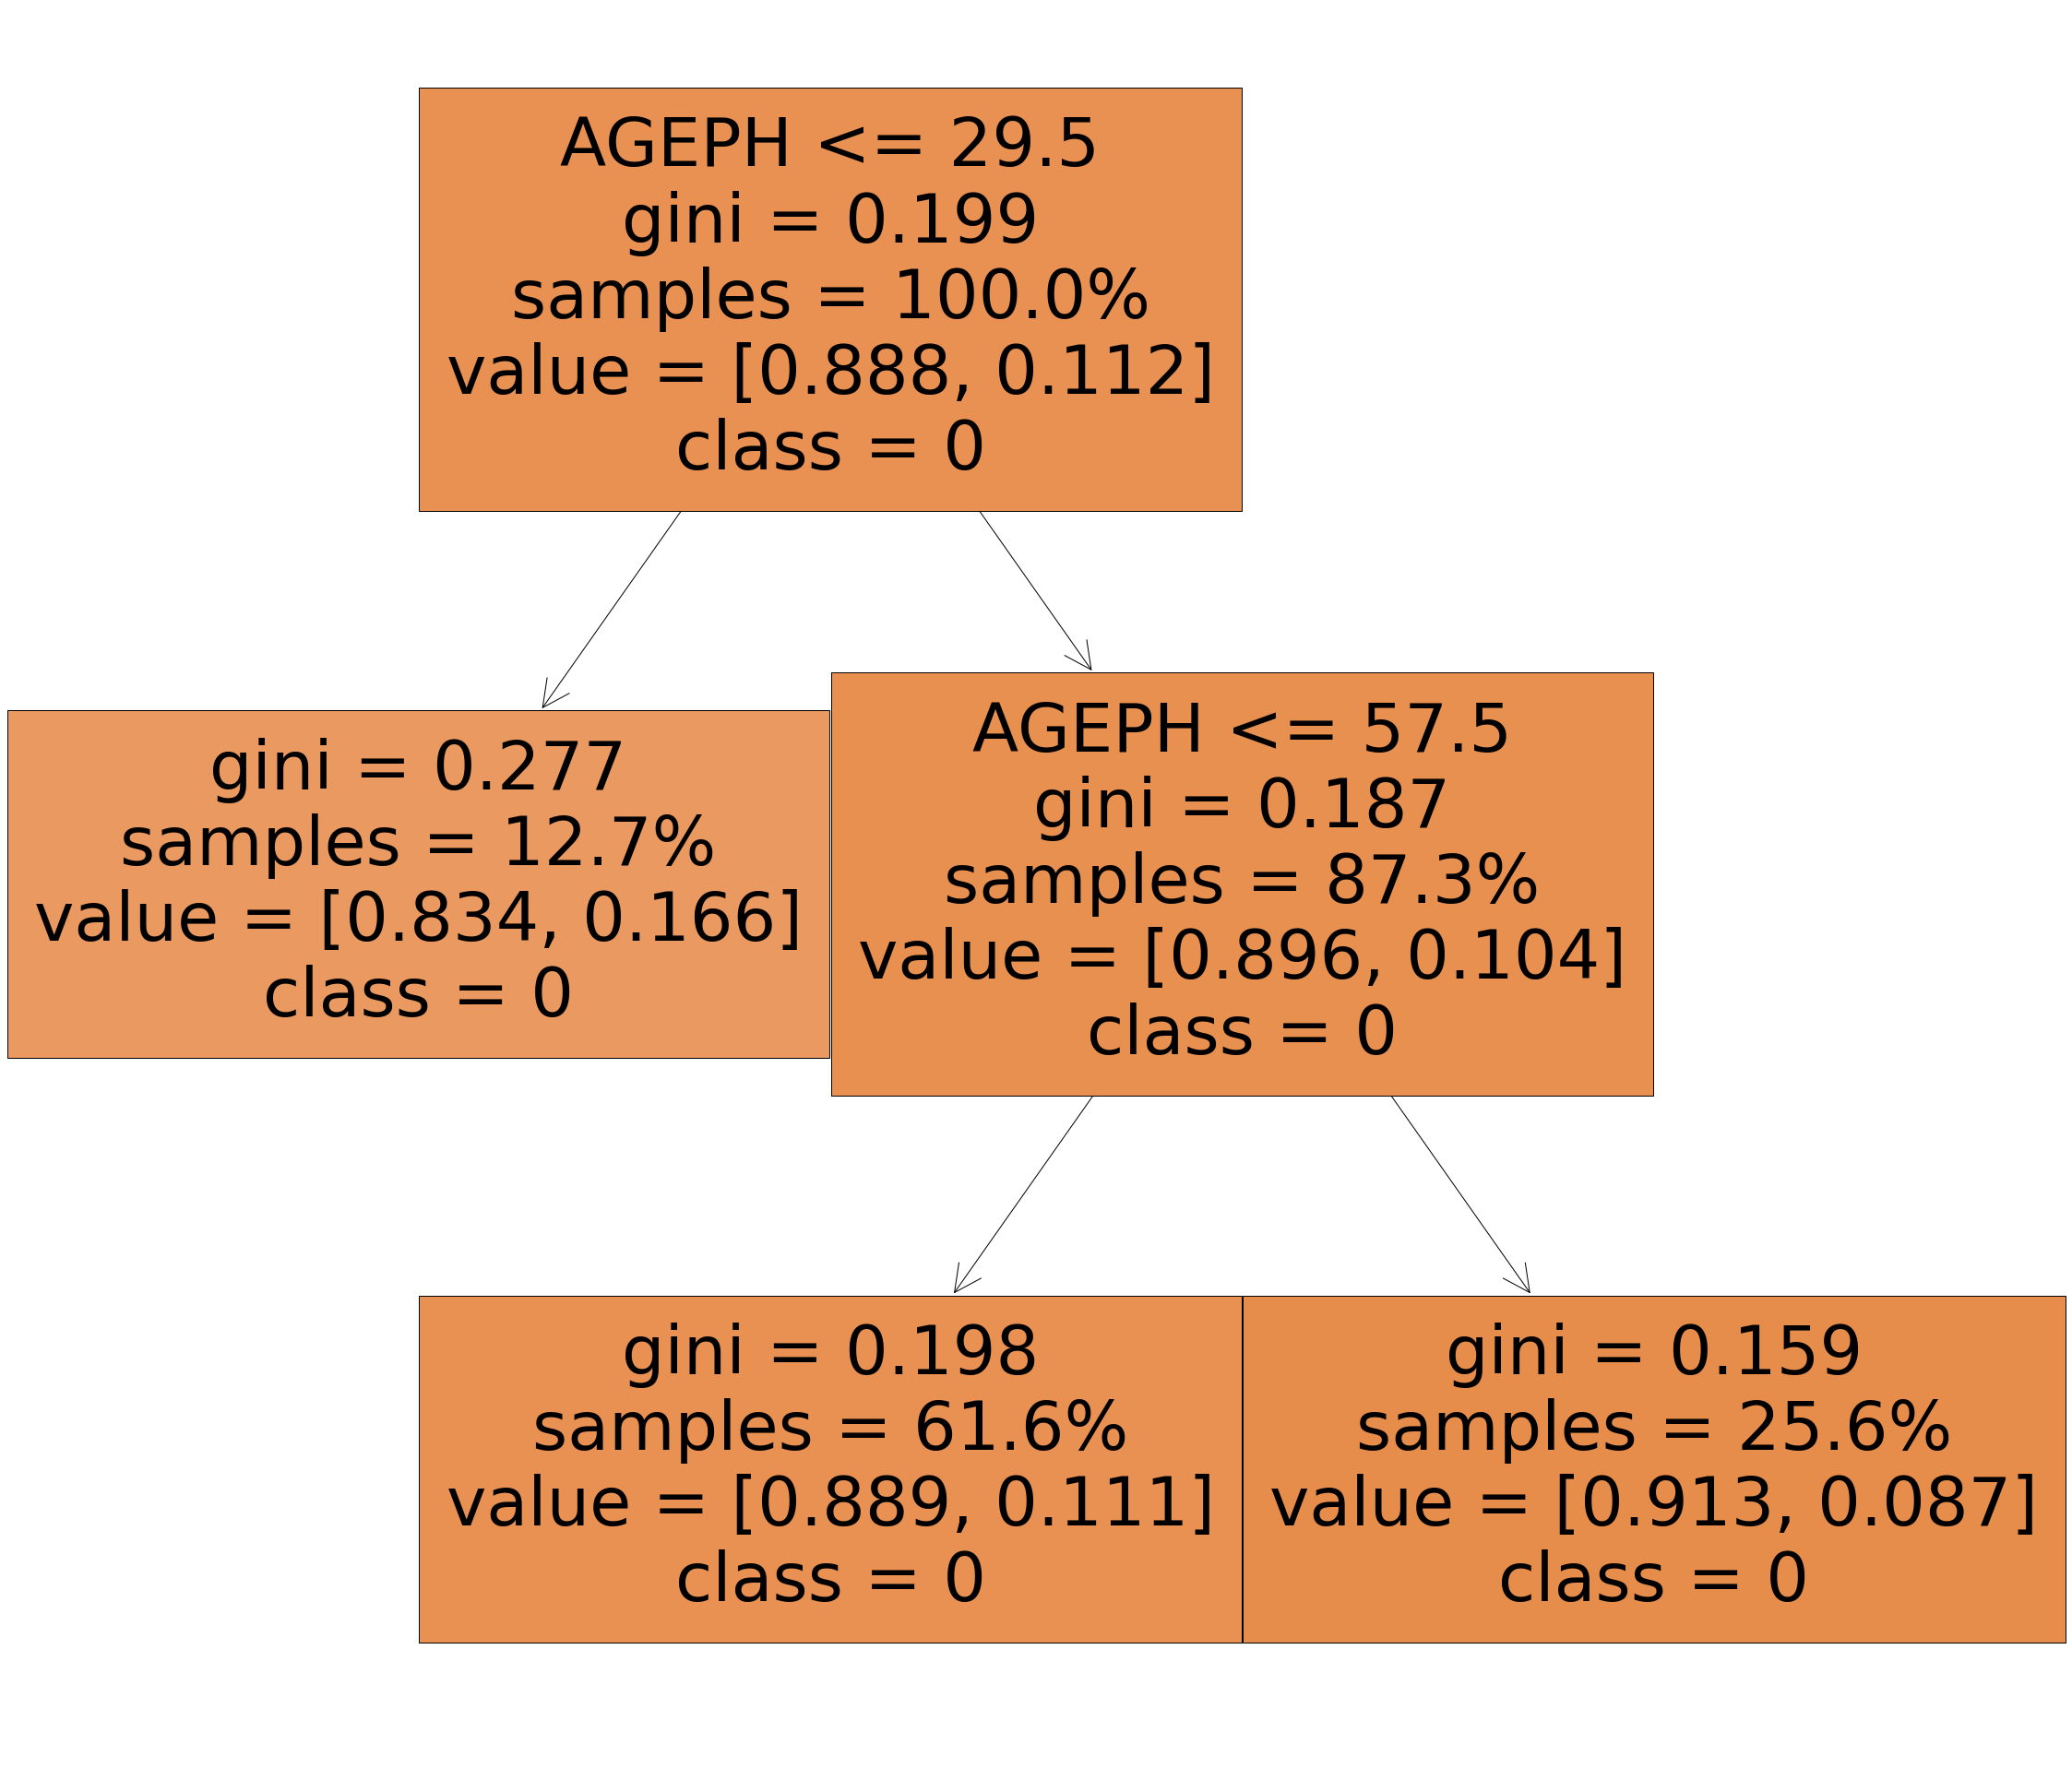

In [20]:
class_tree_temp = tree.DecisionTreeClassifier(criterion = 'gini',
                                         ccp_alpha = 0.0001,
                                        )
class_tree_temp.fit(X_train_bis,y_train)

fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(class_tree_temp, 
                   feature_names=X_train_bis.columns,  
                   class_names=['0','1'],
                   filled=True,
                proportion=True)

## Chapter 3.3 - Number of claims prediction : Regression  trees <a name="three-three"></a>

Let us now try to model the number of claims with a regression tree by taking into account the exposure. 

As opposed to the rpart function of the rpart package in R, it is not possible in sklearn to specify the exposure as an offset in the model. The optimal way to model the claim number would be to be able to specify the following : 

- **response variable** : Number of claims
- **offset** : exposure
- **criterion** :  Poisson distribution

This would correspond to the following optimal assumption : 

$$ N \sim\mathcal{Poi}(expo*Mean Frequency)$$


In order to take into account the exposure in sklearn we have to enter as response variable the frequency (instead of the number of claims) and specify a weight (equal to the exposure). 


The regression tree will have the following specifications : 

- **response variable** : frequency
- **weight** : exposure
- **criterion** : Poisson distribution

Using such a regression tree corresponds to the following (incorrect) assumption : 


$$ \frac{N}{expo}\sim\mathcal{Poi}(Mean Frequency)$$

However, just as when the **rpart** function is used **in R**, the following 2 specifications are equivalent in terms of final results : 
 
|Response variable | Distribution | Exposure |
|------------------|--------------|----------|
| Claim Number     | Poisson      | Offset   |
| Claim Frequency  | Poisson	  | Weights  |



This is because in rpart and scikit the weights are used to weigh each term of the Poisson likelihood. A weighted poisson likelihood on the claim frequency is equivalent to a non weighted poisson likelihood on the claim number with exposure as offset. 

Indeed , when $$ N_i \sim\mathcal{Poi}(d_i*\lambda_i) $$ 
we have a log-likelihood given by $$ l(\lambda)= \sum_{i=1}^{N}[n_i log(\lambda_i)-d_i \lambda_i] + K$$ 

When $$ \tilde{N}_i=\frac{N_i}{d_i}\sim\mathcal{Poi}(\lambda_i)$$
we have a weighted poisson log-likelihood given by $$ l(\lambda)= \sum_{i=1}^{N}d_i[\tilde{n}_i log(\lambda_i)-\lambda_i] + K$$ 


Let us mention that if we use the mse criteria then the following (incorrect) assumption is made : 

$$ \frac{N}{expo}\sim\mathcal{N}(Mean Frequency)$$


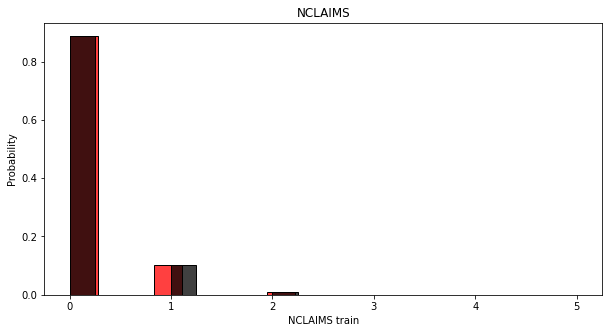

In [10]:
np.random.seed(123)

mtpl_python_X = mtpl_python.drop(labels=['NCLAIMS','NCLAIMS_2'], axis=1) 
mtpl_python_X_train, mtpl_python_X_test, mtpl_python_y_train, mtpl_python_y_test = train_test_split(mtpl_python_X,mtpl_python.NCLAIMS, test_size=0.2, stratify=mtpl_python.NCLAIMS)

df = pd.DataFrame(mtpl_python_y_train)
df1 = pd.DataFrame(mtpl_python_y_test)

plot_pd = pd.concat([df,df1], ignore_index=True, axis=1)

#rename columns for x-label
plot_pd.columns = ['NCLAIMS train', 'NCLAIMS test']

#plot 

fig, axs = plt.subplots(ncols=1, figsize=(10,5));
sb.histplot(plot_pd ['NCLAIMS train'], ax = axs, color='r',stat="probability").set(title='NCLAIMS');
sb.histplot(plot_pd['NCLAIMS test'], ax = axs, color='k',stat="probability");
plt.show()

In [11]:
X_train=mtpl_python_X_train[['COVERAGE','FUEL','FLEET','SEX','AGEPH','AGEC','POWER']]
y_train=mtpl_python_y_train

X_train_bis=pd.get_dummies(data=X_train,drop_first=True)


X_test=mtpl_python_X_test[['COVERAGE','FUEL','FLEET','SEX','AGEPH','AGEC','POWER']]
y_test=mtpl_python_y_test
X_test_bis=pd.get_dummies(data=X_test,drop_first=True)

X_train_bis.head()


,AGEPH,AGEC,POWER,COVERAGE_PO,COVERAGE_TPL,FUEL_gasoline,FLEET_Y,SEX_male
79929,48,5,105,0,1,1,0,1
88290,58,5,65,1,0,1,0,1
4600,43,12,63,0,1,0,0,1
12384,29,2,53,0,0,0,0,1
74505,23,5,58,1,0,1,0,0


Let us illustrate the impact of the loss function choice on the modelling of the frequency

In [12]:
y_train_2=mtpl_python_y_train/mtpl_python_X_train['EXP']
y_test_2=mtpl_python_y_test/mtpl_python_X_test['EXP']

reg_tree_mse = tree.DecisionTreeRegressor(criterion='mse',max_depth=3)
reg_tree_poisson = tree.DecisionTreeRegressor(criterion='poisson',max_depth=3)

reg_tree_mse.fit(X_train_bis,y_train_2,sample_weight=mtpl_python_X_train['EXP'])
reg_tree_poisson.fit(X_train_bis,y_train_2,sample_weight=mtpl_python_X_train['EXP'])

DecisionTreeRegressor(criterion='poisson', max_depth=3)

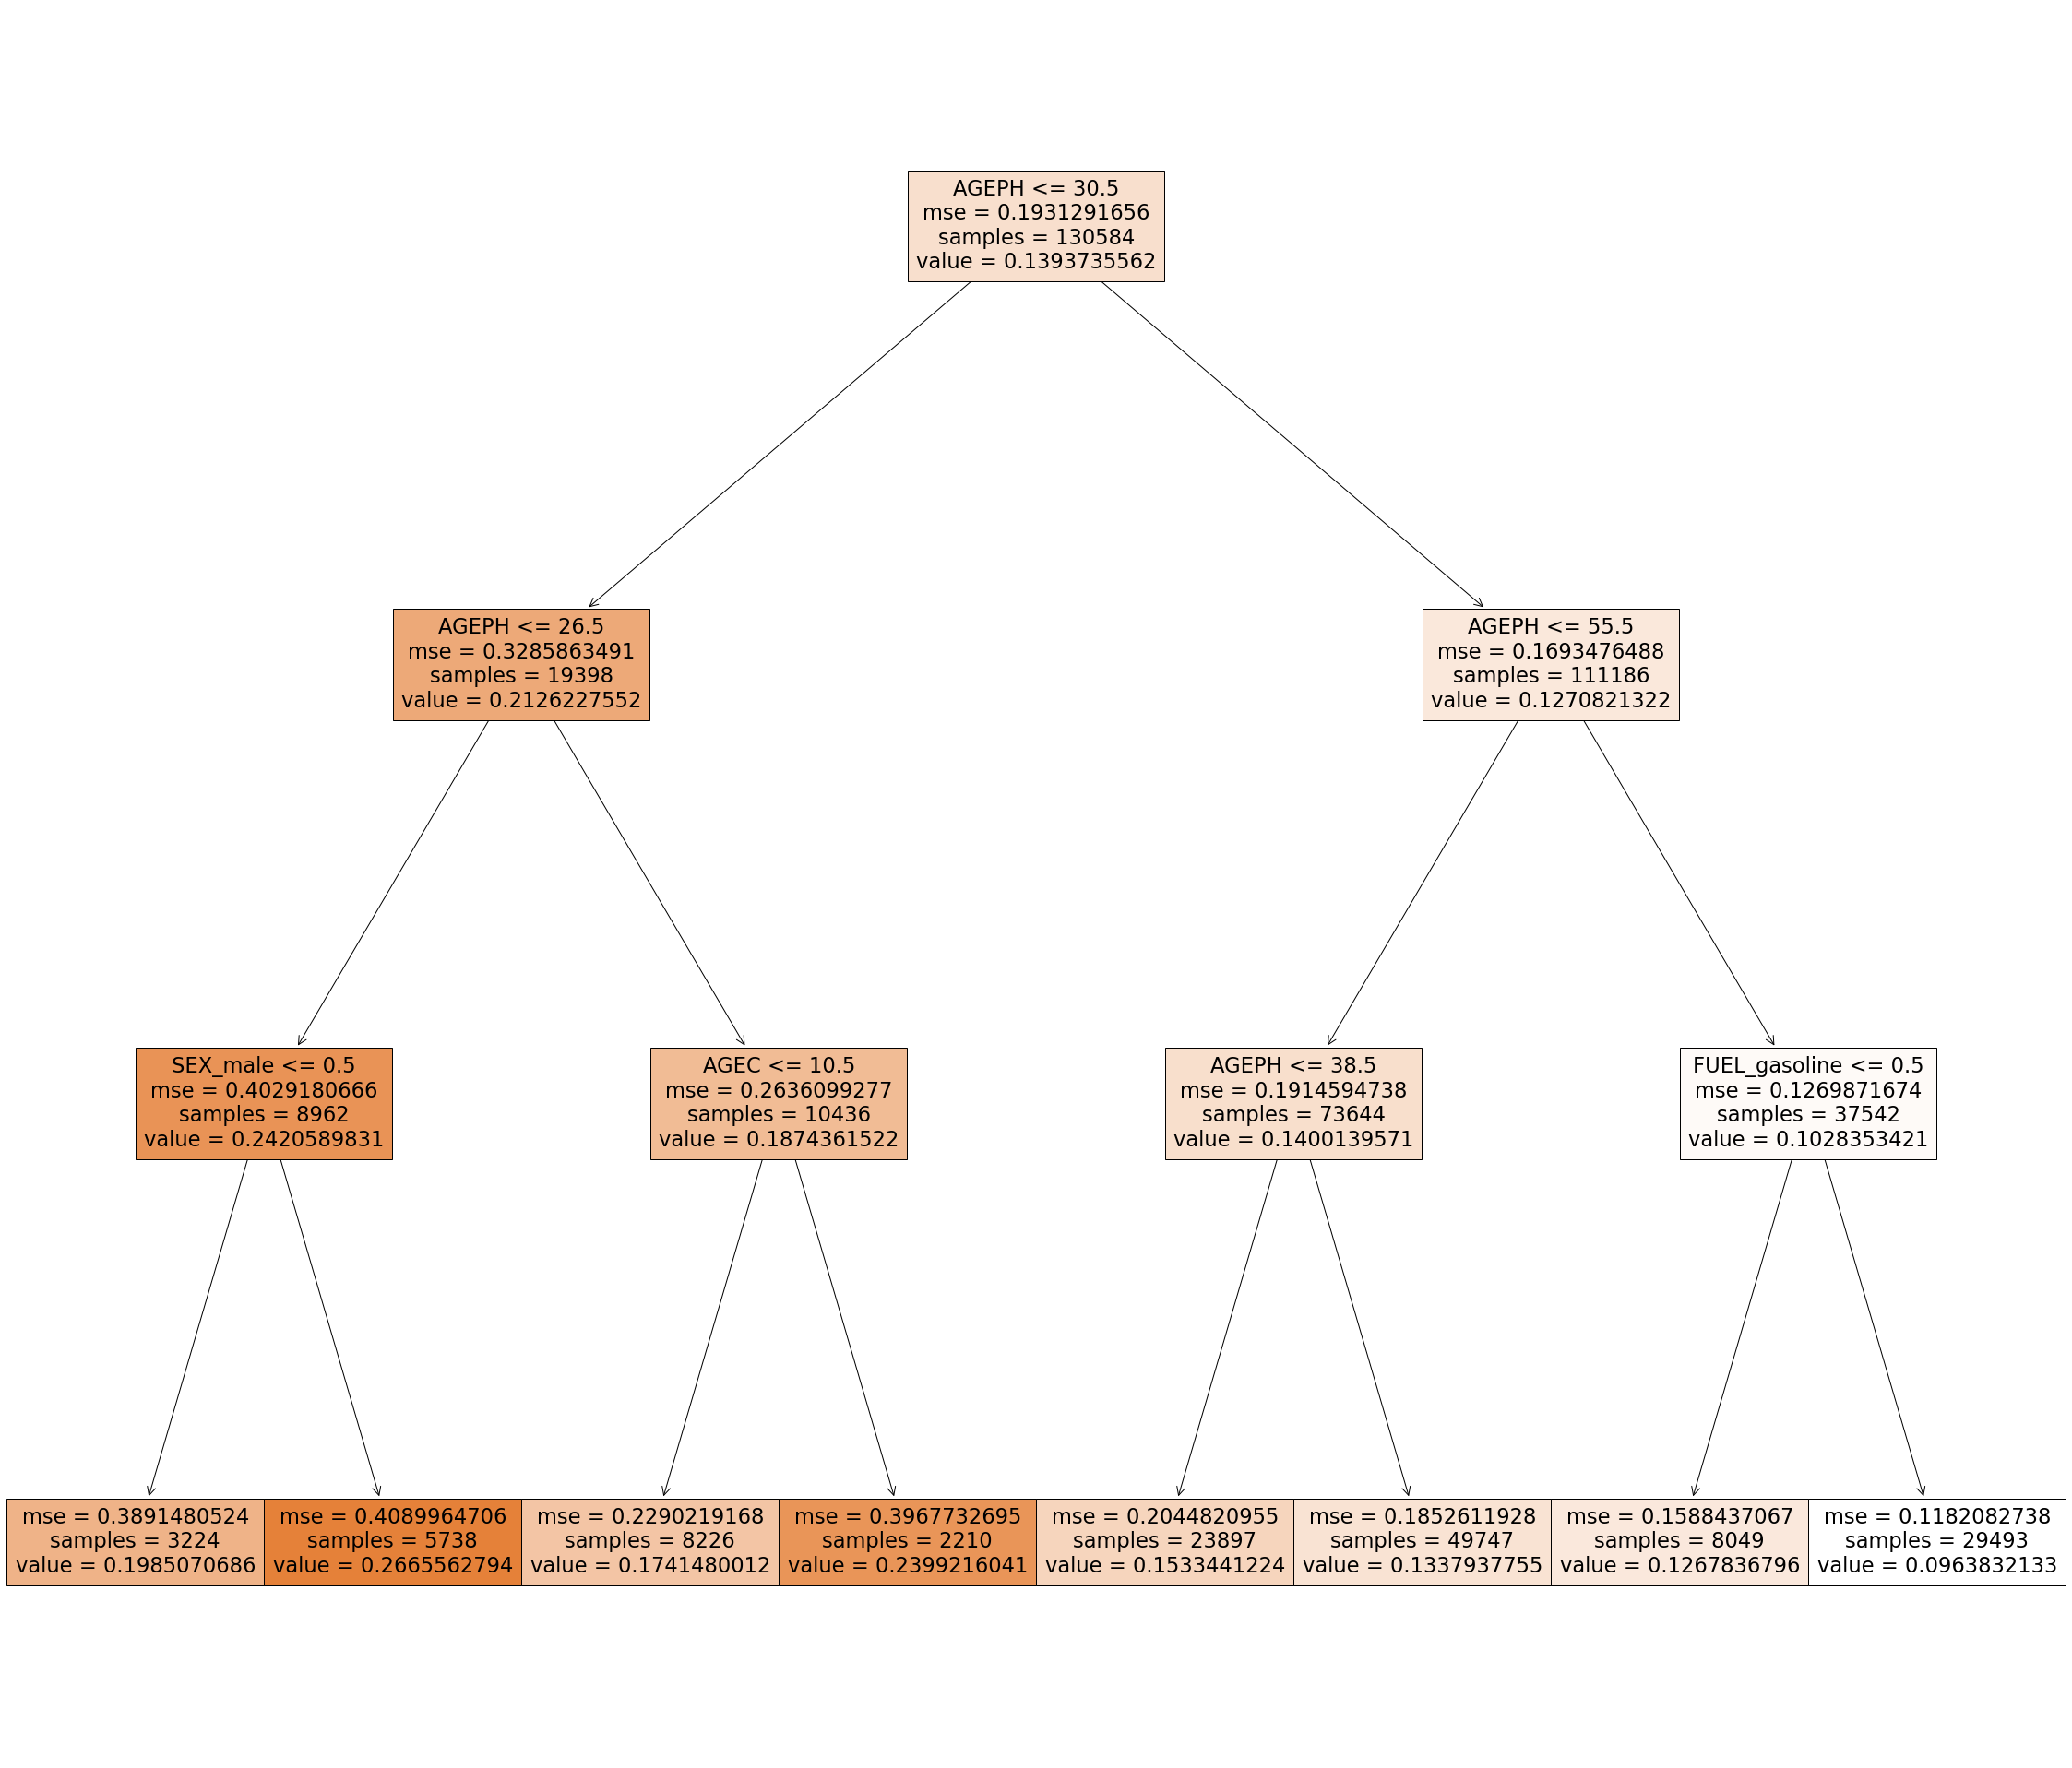

In [13]:
fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(reg_tree_mse, 
                   feature_names=X_train_bis.columns,  
                   filled=True,
                precision=10)

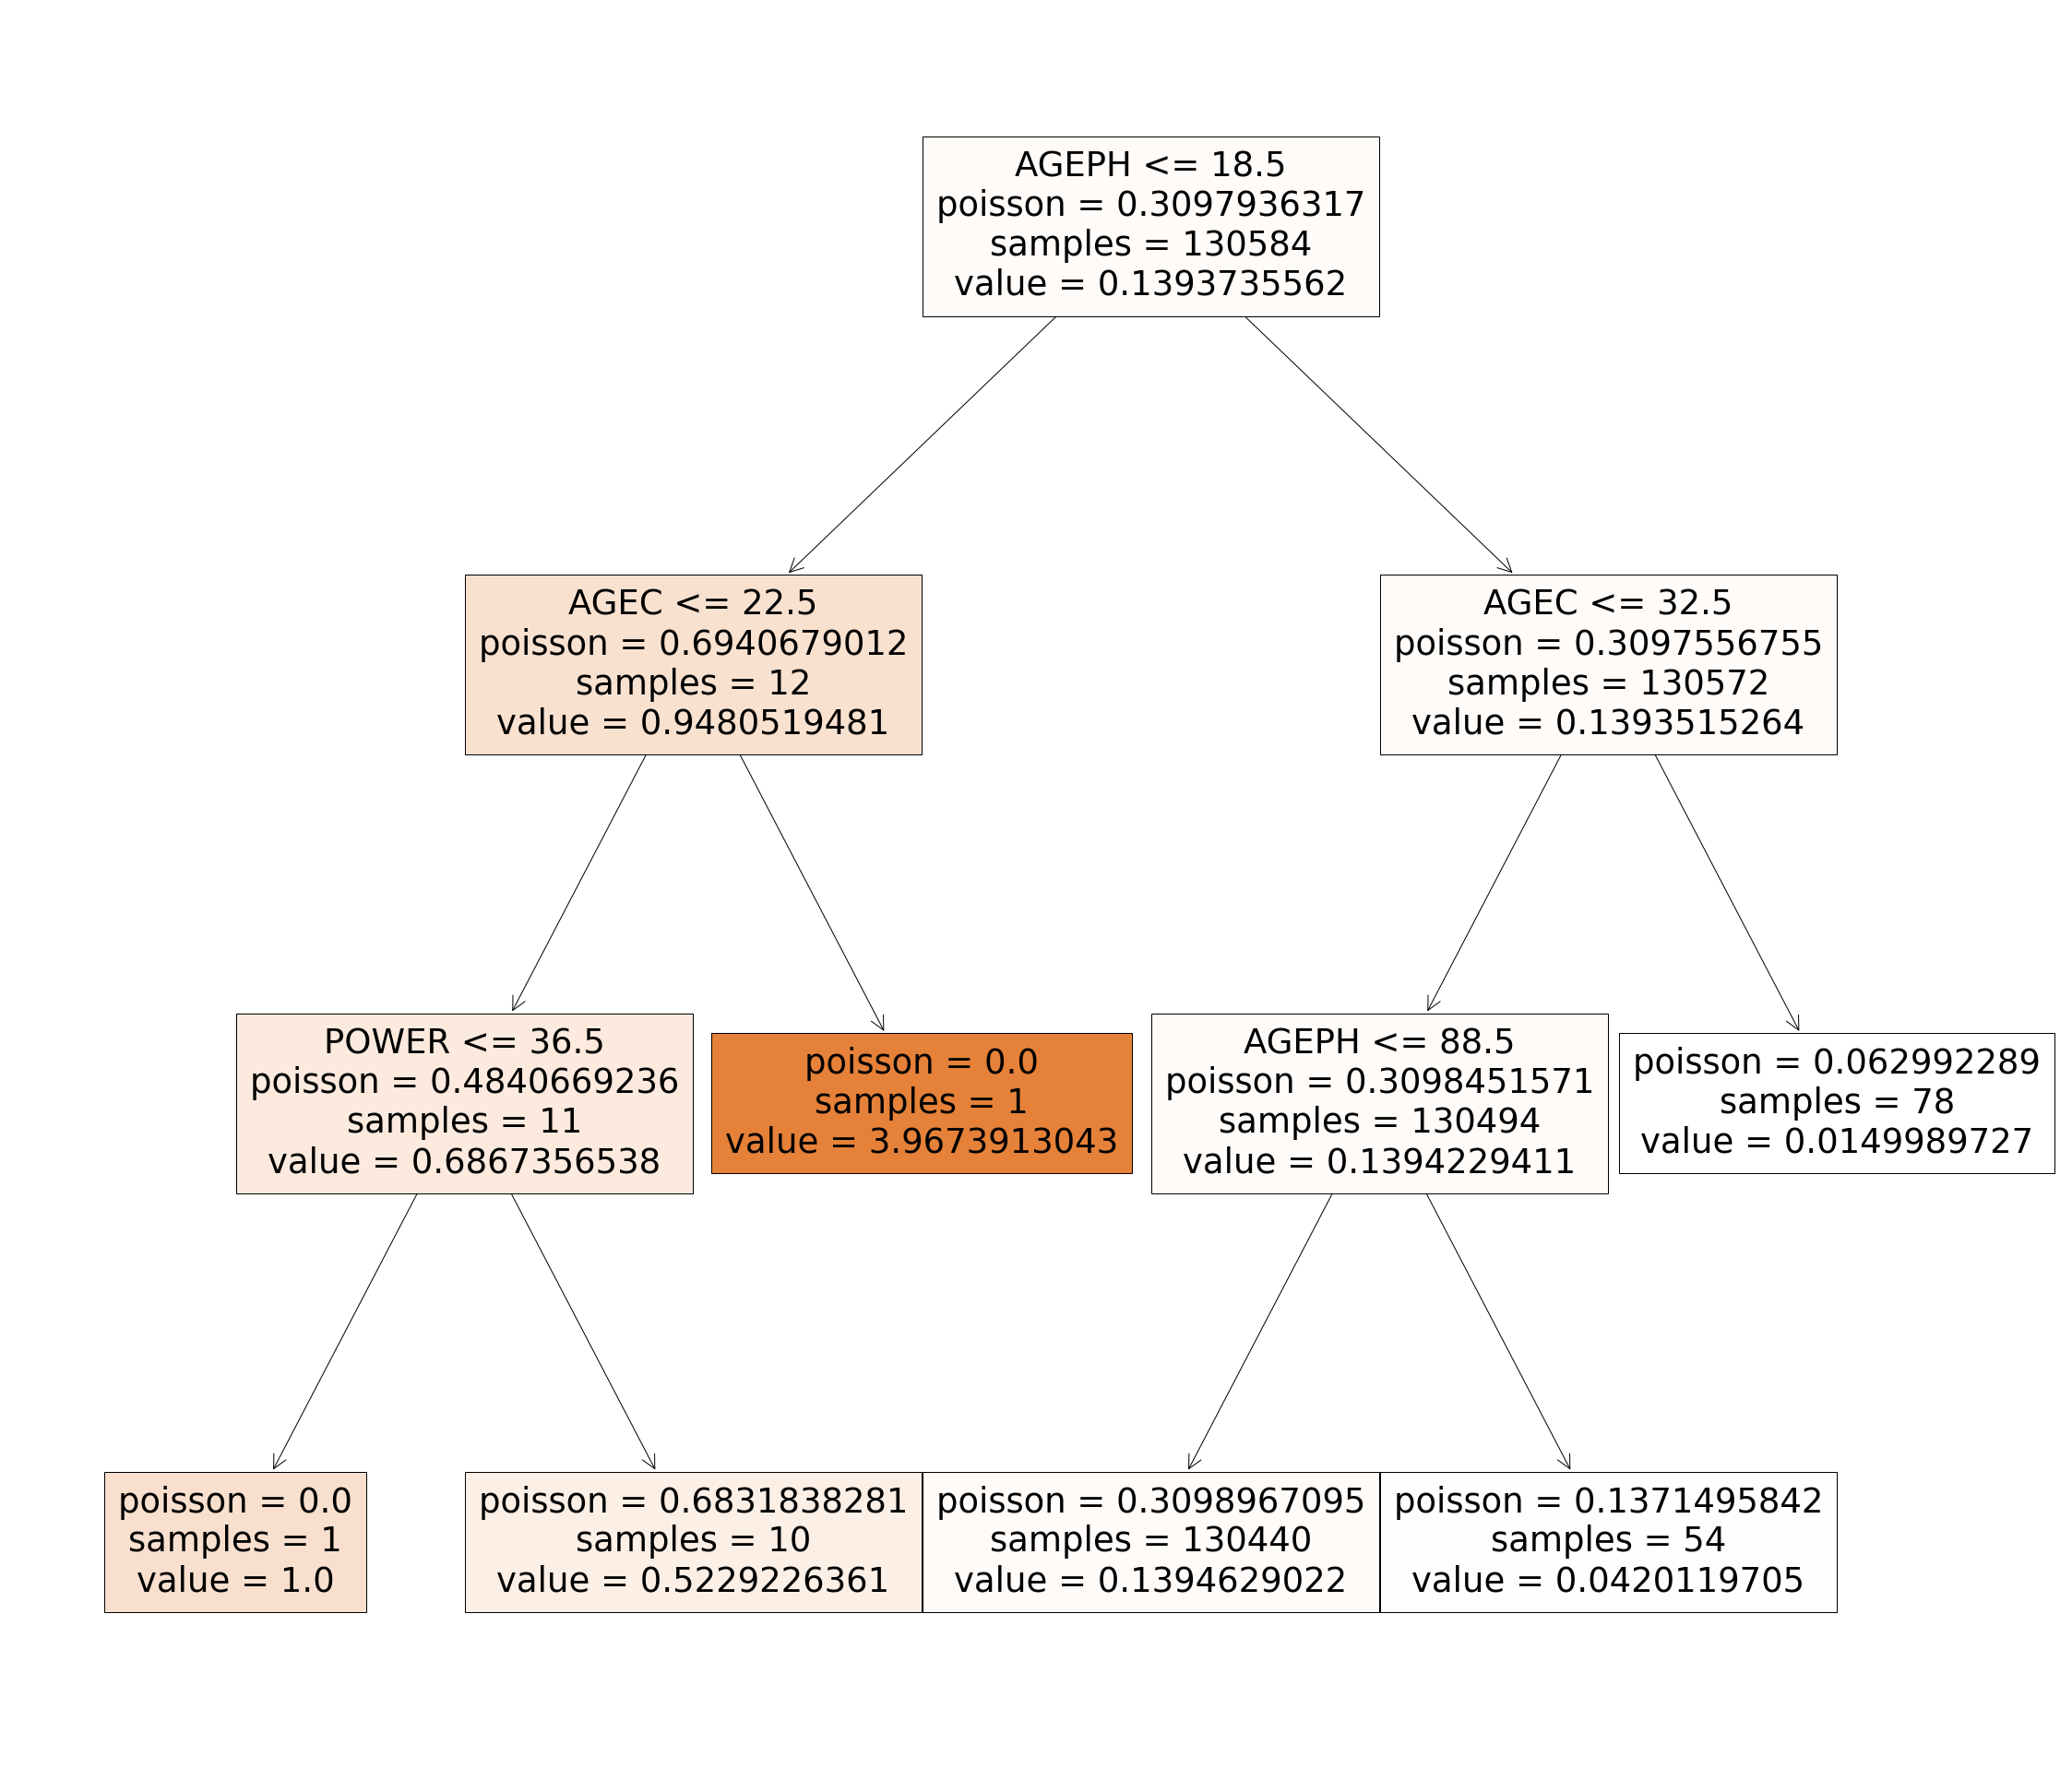

In [14]:
fig = plt.figure(figsize=(40,35))
_=tree.plot_tree(reg_tree_poisson, 
                   feature_names=X_train_bis.columns,  
                   filled=True,
                precision=10)

We can print the values of the impurities for the different depth (from max depth to single node) of the final trees :

In [15]:
pd.DataFrame(reg_tree_mse.cost_complexity_pruning_path(X_train_bis, y_train_2,sample_weight=mtpl_python_X_train['EXP']))

,ccp_alphas,impurities
0,0.000000,0.191637
1,0.000046,0.191683
2,0.000046,0.191729
3,0.000054,0.191783
4,0.000071,0.191854
5,0.000107,0.191960
6,0.000269,0.192229
7,0.000900,0.193129


In [16]:
pd.DataFrame(reg_tree_poisson.cost_complexity_pruning_path(X_train_bis, y_train_2,sample_weight=mtpl_python_X_train['EXP']))

,ccp_alphas,impurities
0,0.000000e+00,0.309687
1,8.891838e-07,0.309688
2,6.770981e-06,0.309695
3,1.927337e-05,0.309714
4,3.984428e-05,0.309794


Let us define the traditional Poisson deviance, the mean Poisson deviance returned by scikit and the mean squared error computed by scikit as well  : 

In [17]:
def DeviancePoisson(lambdahat,N,v):

    nlogn = np.array([np.nan for i in range(v.size)])
    dev = np.array([np.nan for i in range(v.size)])
    
    for i in range(v.size):
        if N[i]==0:
            nlogn[i] = 0
        else:
            nlogn[i] = N[i]*math.log(N[i]/(lambdahat[i]*v[i]))
            
        dev[i] = 2*( nlogn[i] - (N[i] - lambdahat[i]*v[i]) )
        
    return(dev.sum())

In [18]:
def DeviancePoisson_scikit(lambdahat,N,v):

    nlogn = np.array([np.nan for i in range(v.size)])
    dev = np.array([np.nan for i in range(v.size)])
    
    for i in range(v.size):
        if N[i]==0:
            nlogn[i] = 0
        else:
            nlogn[i] = N[i]*math.log(N[i]/(lambdahat[i]*v[i]))
            
        dev[i] = ( nlogn[i] - (N[i] - lambdahat[i]*v[i]) )
        
    return(dev.sum()/v.sum())

In [19]:
def MSError_scikit(lambdahat,N,v):

    serror = np.array([np.nan for i in range(v.size)])
    
    for i in range(v.size):
        
        serror[i] = v[i]*(N[i]/v[i]-lambdahat[i])**2
        
    return(serror.sum()/v.sum())

We see that we can replicate the impurities of the final models : 

In [20]:
print(MSError_scikit(np.array(reg_tree_mse.predict(X_train_bis)),np.array(y_train),np.array(mtpl_python_X_train['EXP'])))
print(DeviancePoisson_scikit(np.array(reg_tree_poisson.predict(X_train_bis)),np.array(y_train),np.array(mtpl_python_X_train['EXP'])))

0.1916367731427217
0.30968700965964013


In [32]:
print("Deviance on Training")
print("Poisson model",DeviancePoisson_scikit(np.array(reg_tree_poisson.predict(X_train_bis)),np.array(y_train),np.array(mtpl_python_X_train['EXP'])))

print("Deviance on Test")
print("Poisson model",DeviancePoisson_scikit(np.array(reg_tree_poisson.predict(X_test_bis)),np.array(y_test),np.array(mtpl_python_X_test['EXP'])))

Deviance on Training
Poisson model 0.30968700965964013
Deviance on Test
Poisson model 0.3090366419386779


In [33]:
print("MSE on Training")
print("MSE model",MSError_scikit(np.array(reg_tree_mse.predict(X_train_bis)),np.array(y_train),np.array(mtpl_python_X_train['EXP'])))
print("MSE on Test")
print("MSE model",MSError_scikit(np.array(reg_tree_mse.predict(X_test_bis)),np.array(y_test),np.array(mtpl_python_X_test['EXP'])))


MSE on Training
MSE model 0.1916367731427217
MSE on Test
MSE model 0.189442204486056


When imposing the size of the tree to max 3 the models seem better on testing set than on training set. Let us tune the poisson tree by optimising the complexity parameter.

Let us first build the deepest tree : 

In [34]:
reg_tree_poi = tree.DecisionTreeRegressor(criterion='poisson',random_state=0)
reg_tree_poi.fit(X_train_bis,y_train_2,sample_weight=mtpl_python_X_train['EXP'])

print('number of node is : ',reg_tree_poi.tree_.node_count)
print('tree depth is :',reg_tree_poi.tree_.max_depth)
pd.DataFrame(reg_tree_poi.cost_complexity_pruning_path(X_train_bis, y_train_2,sample_weight=mtpl_python_X_train['EXP']))


number of node is :  26759
tree depth is : 98


,ccp_alphas,impurities
0,0.000000e+00,0.229057
1,-1.355253e-20,0.229057
2,-6.776264e-21,0.229057
3,-6.776264e-21,0.229057
4,-3.388132e-21,0.229057
...,...,...
6290,1.013738e-04,0.306677
6291,1.024994e-04,0.307600
6292,1.091237e-04,0.307709
6293,1.201426e-04,0.307949


We will loop over the different values of alpha (rounded because otherwise there are too many to loop over) and for each value we will fit a regression tree on the training set and compute the prediction error on the testing set. 

We define the range of complexity parameters to test : 

In [35]:
ccp_alphas_poi=reg_tree_poi.cost_complexity_pruning_path(X_train_bis, y_train_2,sample_weight=mtpl_python_X_train['EXP']).ccp_alphas
ccp_alphas_poi_2=ccp_alphas_poi[ccp_alphas_poi >=0]
ccp_alphas_poi_3=np.unique(np.round(ccp_alphas_poi_2,5))
ccp_alphas_poi_3.shape





(10,)

We train a model for each complexity parameter and compute the corresponding deviance on the train and test sets : 

In [36]:
reg_tree_poi_list = []
for ccp_alpha in ccp_alphas_poi_3:
    reg_tree_poi = tree.DecisionTreeRegressor(criterion='poisson',random_state=0, ccp_alpha=ccp_alpha)
    reg_tree_poi.fit(X_train_bis,y_train_2,sample_weight=mtpl_python_X_train['EXP'])
    reg_tree_poi_list.append(reg_tree_poi)

train_POIscores_poi = [DeviancePoisson(np.array(reg_tree_poi.predict(X_train_bis)),np.array(y_train),np.array(mtpl_python_X_train['EXP'])) for reg_tree_poi in reg_tree_poi_list]
test_POIscores_poi = [DeviancePoisson(np.array(reg_tree_poi.predict(X_test_bis)),np.array(y_test),np.array(mtpl_python_X_test['EXP'])) for reg_tree_poi in reg_tree_poi_list]



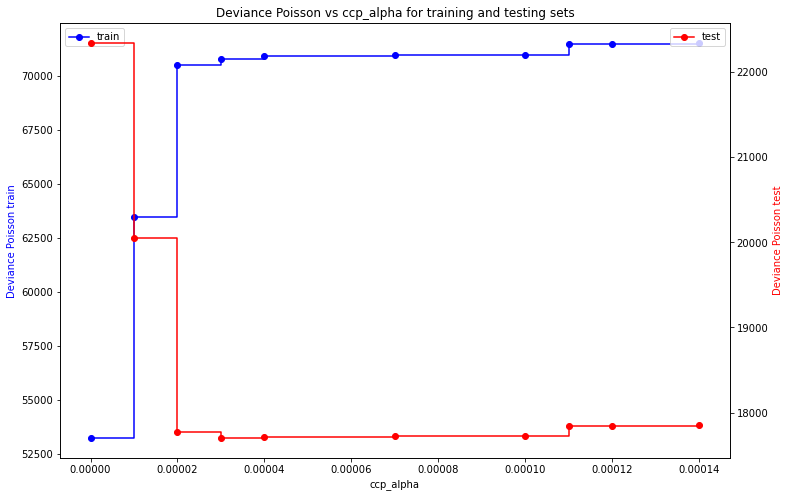

In [37]:
fig, ax1 = plt.subplots(figsize=(12,8))


ax1.set_xlabel("ccp_alpha")
ax1.set_ylabel("Deviance Poisson train",color='blue')
ax1.set_title("Deviance Poisson vs ccp_alpha for training and testing sets")
ax1.plot(ccp_alphas_poi_3, train_POIscores_poi, marker="o", color='blue',label="train", drawstyle="steps-post")
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel("Deviance Poisson test",color='red')

ax2.plot(ccp_alphas_poi_3, test_POIscores_poi, marker="o", color='red',label="test", drawstyle="steps-post")
ax2.legend()
plt.show()


A value 0.00003 seems appropriate. Further complexity leads to overfitting.

In this tuning only a single test set was used. Let us now optimize the value of the complexity parameter by performing a crossvalidation on the training set.

We define the complexity parameter grid  :

In [38]:
ccp_alpha = np.arange(0,0.00014,0.00002)
ccp_alpha

array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04])

We choose to perform a 5 fold crossvalidation : 

In [39]:
num_k_fold = 5

We initiate the table which will store for each ccp_alpha value the mean deviance on training and testing for each of the 5 possible partitions. 

In [40]:
scores = pd.DataFrame(columns = ['CCP_alpha', 'Mean Deviance (testing)', 'Mean Deviance (training)'],
                      data = np.zeros((num_k_fold * len(ccp_alpha), 3)))
scores.head()

,CCP_alpha,Mean Deviance (testing),Mean Deviance (training)
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [41]:
y_train_exp=mtpl_python_X_train['EXP']

# Starting time
start_global = time.time()

# Loop over the number of trees
for j in range(len(ccp_alpha)):
    i = 0 # track the partition
    
    # Initiate k-fold object
    kf = KFold(n_splits = num_k_fold, shuffle = True)
    
    # Record starting time
    start = time.time()
    
    # k-fold cross-validation for the selected number of trees
    for train, test in kf.split(X_train_bis):
        # Select training and testing subsets
        X_train_cv, y_train_cv, y_train_exp_cv = X_train_bis.iloc[train], y_train_2.iloc[train], y_train_exp.iloc[train]
        X_test_cv, y_test_cv, y_test_exp_cv = X_train_bis.iloc[test], y_train_2.iloc[test], y_train_exp.iloc[test]
        
        # Training
        model = tree.DecisionTreeRegressor(criterion='poisson',random_state=0, ccp_alpha=ccp_alpha[j])
        model.fit(X_train_cv, y_train_cv, sample_weight = y_train_exp_cv)
        
        # Prediction
        y_pred_train_cv = model.predict(X_train_cv)
        y_pred_test_cv = model.predict(X_test_cv)

        # Metrics
        index = j * num_k_fold + i
        scores.at[index, 'CCP_alpha'] = ccp_alpha[j]
        scores.at[index, 'Mean Deviance (testing)'] = DeviancePoisson_scikit(np.array(y_pred_test_cv),np.array(y_test_cv*y_test_exp_cv),np.array(y_test_exp_cv))
        scores.at[index, 'Mean Deviance (training)'] = DeviancePoisson_scikit(np.array(y_pred_train_cv),np.array(y_train_cv*y_train_exp_cv),np.array(y_train_exp_cv))
        i = i + 1
    
    # Elasped time for the k-fold step
    end = time.time()
    elapsed = end - start
    print('Step', j + 1, 'completed (', elapsed, 'sec)...')

# Global elapsed time
end_global = time.time()
elapsed = end_global - start_global
print('Total time:', elapsed, 'sec!')

Step 1 completed ( 4.476006746292114 sec)...
Step 2 completed ( 6.318960666656494 sec)...
Step 3 completed ( 6.210902214050293 sec)...
Step 4 completed ( 6.627666473388672 sec)...
Step 5 completed ( 6.663807392120361 sec)...
Step 6 completed ( 6.765156507492065 sec)...
Step 7 completed ( 6.162745952606201 sec)...
Total time: 43.226242780685425 sec!


In [42]:
scores.head(n=10)

,CCP_alpha,Mean Deviance (testing),Mean Deviance (training)
0,0.00000,0.367228,0.228634
1,0.00000,0.380911,0.226841
2,0.00000,0.381063,0.225672
3,0.00000,0.378734,0.226079
4,0.00000,0.380763,0.227211
5,0.00002,0.303730,0.302596
6,0.00002,0.312051,0.302092
7,0.00002,0.308258,0.301817
8,0.00002,0.303741,0.302837
9,0.00002,0.313564,0.300358


In [43]:
gp = scores.groupby('CCP_alpha')
means = gp.mean()
means

,Mean Deviance (testing),Mean Deviance (training)
CCP_alpha,,
0.00000,0.377740,0.226887
0.00002,0.308269,0.301940
0.00004,0.305739,0.304813
0.00006,0.305973,0.305138
0.00008,0.306251,0.305441
0.00010,0.306674,0.306186
0.00012,0.307007,0.306626


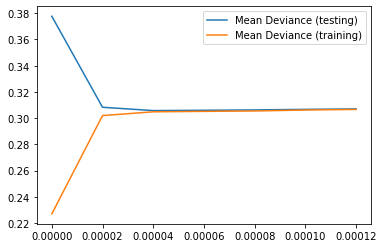

In [44]:
measures = ['Mean Deviance (testing)', 'Mean Deviance (training)']
plt.figure()
plt.plot(means[measures])
plt.legend(measures)
plt.show()

Optimal value is at 0.00004

# Chapter 4 - Exercice - Modelling of the Sales_Price <a name="four"></a>

**Exercice** 

*Optimise the complexity parameter of a regression tree on the Sale_Price of the ames data set using a single validation set (no crossvalidation). Use the following expanatory variables :* 

- MS_Zoning
- Exter_Qual
- Year_Built
- Lot_Area 

In [45]:
ames_python.head()

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [46]:
pd.options.display.max_columns = 82
ames_python.describe(include='all')

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
count,2930.00000,2930,2930,2930.000000,2930.000000,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930.000000,2930,2930,2930,2930,2930,2930.000000,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930.000000,2930,2930.000000,2930,2930,2930,2930.000000,2930.000000,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000,2930.000000,2930.000000
unique,NaN,16,7,NaN,NaN,2,3,4,4,3,5,3,28,9,8,5,8,10,9,NaN,NaN,6,8,16,17,5,NaN,4,5,6,6,6,5,7,NaN,7,NaN,NaN,NaN,6,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,6,7,4,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,5,5,6,NaN,NaN,NaN,10,6,NaN,NaN,NaN
top,NaN,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,NaN,NaN,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Average,Average,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,Typical,Typical,PConc,Typical,Typical,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Excellent,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Typical,NaN,Typ,NaN,No_Fireplace,Attchd,Unf,NaN,NaN,Typical,Typical,Paved,NaN,NaN,NaN,NaN,NaN,NaN,No_Pool,No_Fence,None,NaN,NaN,NaN,WD,Normal,NaN,NaN,NaN
freq,NaN,1079,2273,NaN,NaN,2918,2732,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,825,1654,NaN,NaN,2321,2887,1026,1015,1775,NaN,1799,2549,1310,1283,2616,1906,859,NaN,2499,NaN,NaN,NaN,2885,1495,2734,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN,2728,NaN,1422,1731,1231,NaN,NaN,2615,2665,2652,NaN,NaN,NaN,NaN,NaN,NaN,2917,2358,2824,NaN,NaN,NaN,2536,2413,NaN,NaN,NaN
mean,1465.50000,NaN,NaN,57.647782,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971.356314,1984.266553,NaN,NaN,NaN,NaN,NaN,101.096928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.177474,NaN,49.705461,559.071672,1051.255631,NaN,NaN,NaN,NaN,1159.557679,335.455973,4.676792,1499.690444,0.431058,0.061092,1.566553,0.379522,2.854266,1.044369,NaN,6.443003,NaN,0.599317,NaN,NaN,NaN,1.766212,472.658362,NaN,NaN,NaN,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068,-93.642897,42.034482
std,845.96247,NaN,NaN,33.499441,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.245361,20.860286,NaN,NaN,NaN,NaN,NaN,178.634545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.233372,NaN,169.142089,439.540571,440.968018,NaN,NaN,NaN,NaN,391.890885,428.395715,46.310510,505.508887,0.524762,0.245175,0.552941,0.502629,0.827731,0.214076,NaN,1.572964,NaN,0.647921,NaN,NaN,NaN,0.761137,215.187196,NaN,NaN,NaN,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357,0.025700,0.018410
min,1.00000,NaN,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1872.000000,1950.00

In [47]:
ames_python_2=ames_python[['MS_Zoning','Lot_Area','Year_Built','Exter_Qual','Sale_Price']]
ames_python_3=pd.get_dummies(data=ames_python_2,drop_first=True)
ames_python_3.head()


,Lot_Area,Year_Built,Sale_Price,MS_Zoning_C_all,MS_Zoning_Floating_Village_Residential,MS_Zoning_I_all,MS_Zoning_Residential_High_Density,MS_Zoning_Residential_Low_Density,MS_Zoning_Residential_Medium_Density,Exter_Qual_Fair,Exter_Qual_Good,Exter_Qual_Typical
0,31770,1960,215000,0,0,0,0,1,0,0,0,1
1,11622,1961,105000,0,0,0,1,0,0,0,0,1
2,14267,1958,172000,0,0,0,0,1,0,0,0,1
3,11160,1968,244000,0,0,0,0,1,0,0,1,0
4,13830,1997,189900,0,0,0,0,1,0,0,0,1


In [48]:
bins = np.linspace(ames_python.Sale_Price.min(),ames_python.Sale_Price.max(), 20 ) 
y_cat = pd.cut(ames_python.Sale_Price,bins=bins,include_lowest=True) 

np.random.seed(123)

ames_python_X = ames_python_3.drop(labels=['Sale_Price'], axis=1) 
ames_python_X_train, ames_python_X_test, ames_python_y_train, ames_python_y_test = train_test_split(ames_python_3,ames_python_3.Sale_Price, test_size=0.3, stratify=y_cat) 

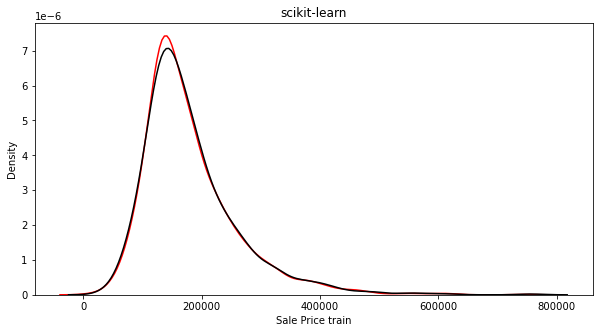

In [49]:
#create dataframe from different vector lengths

df1 = pd.DataFrame(ames_python_y_train)
df2= pd.DataFrame(ames_python_y_test)
plot_pd = pd.concat([df1,df2], ignore_index=True, axis=1)

#rename columns for x-label
plot_pd.columns = ['Sale Price train', 'Sale Price test']

#plot 

fig, axs = plt.subplots(ncols=1, figsize=(10,5));
sb.kdeplot(plot_pd['Sale Price train'], ax = axs, color='r').set(title='scikit-learn');
sb.kdeplot(plot_pd['Sale Price test'], ax = axs, color='k');
plt.show()


In [50]:
X_train=ames_python_X_train
y_train=ames_python_y_train

X_test=ames_python_X_test
y_test=ames_python_y_test



In [51]:
reg_tree = tree.DecisionTreeRegressor(criterion='mse',random_state=0)
reg_tree.fit(X_train,np.log(y_train))

print('number of node is : ',reg_tree.tree_.node_count)
print('tree depth is :',reg_tree.tree_.max_depth)
pd.DataFrame(reg_tree.cost_complexity_pruning_path(X_train, np.log(y_train)))



number of node is :  1993
tree depth is : 17


,ccp_alphas,impurities
0,0.000000e+00,-1.555503e-14
1,4.619163e-18,-1.554117e-14
2,2.078623e-17,-1.545803e-14
3,2.078623e-17,-1.541646e-14
4,2.078623e-17,-1.537488e-14
...,...,...
946,4.944408e-03,1.995590e-02
947,5.208885e-03,2.516478e-02
948,1.995797e-02,4.512275e-02
949,2.313120e-02,6.825395e-02


In [52]:
ccp_alphas=reg_tree.cost_complexity_pruning_path(X_train, np.log(y_train)).ccp_alphas
ccp_alphas_2=ccp_alphas[ccp_alphas >=0]
ccp_alphas_3=np.unique(np.round(ccp_alphas_2,7))
ccp_alphas_3.shape

(87,)

In [53]:
ccp_alphas_3

array([0.000000e+00, 1.000000e-07, 2.000000e-07, 3.000000e-07,
       4.000000e-07, 5.000000e-07, 6.000000e-07, 7.000000e-07,
       8.000000e-07, 9.000000e-07, 1.000000e-06, 1.100000e-06,
       1.200000e-06, 1.300000e-06, 1.400000e-06, 1.500000e-06,
       1.600000e-06, 1.700000e-06, 2.000000e-06, 2.200000e-06,
       2.300000e-06, 2.500000e-06, 2.700000e-06, 2.800000e-06,
       2.900000e-06, 3.500000e-06, 3.600000e-06, 4.100000e-06,
       5.200000e-06, 5.400000e-06, 5.700000e-06, 6.000000e-06,
       6.200000e-06, 6.400000e-06, 6.600000e-06, 6.700000e-06,
       7.200000e-06, 7.400000e-06, 7.500000e-06, 7.900000e-06,
       8.200000e-06, 9.000000e-06, 9.500000e-06, 1.110000e-05,
       1.150000e-05, 1.200000e-05, 1.220000e-05, 1.240000e-05,
       1.280000e-05, 1.510000e-05, 1.550000e-05, 1.590000e-05,
       1.790000e-05, 1.850000e-05, 2.020000e-05, 3.040000e-05,
       4.140000e-05, 4.270000e-05, 4.420000e-05, 4.960000e-05,
       5.320000e-05, 5.340000e-05, 7.140000e-05, 7.3000

In [54]:
reg_tree_list = []
for ccp_alpha in ccp_alphas_3:
    reg_tree = tree.DecisionTreeRegressor(criterion='mse',random_state=0, ccp_alpha=ccp_alpha)
    reg_tree.fit(X_train,np.log(y_train))
    reg_tree_list.append(reg_tree)

train_MSE = [mean_squared_error(np.array(np.exp(reg_tree.predict(X_train))),np.array(y_train)) for reg_tree in reg_tree_list]
test_MSE = [mean_squared_error(np.array(np.exp(reg_tree.predict(X_test))),np.array(y_test)) for reg_tree in reg_tree_list]


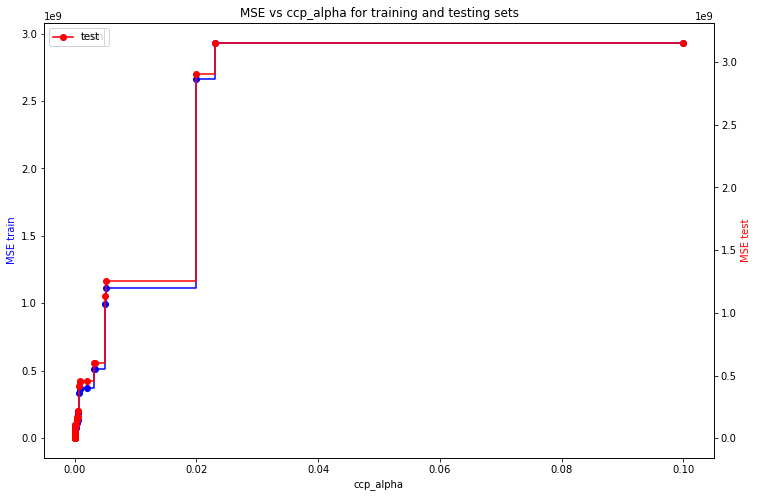

In [55]:
fig, ax1 = plt.subplots(figsize=(12,8))


ax1.set_xlabel("ccp_alpha")
ax1.set_ylabel("MSE train",color='blue')
ax1.set_title("MSE vs ccp_alpha for training and testing sets")
ax1.plot(ccp_alphas_3, train_MSE, marker="o", color='blue',label="train", drawstyle="steps-post")
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel("MSE test",color='red')

ax2.plot(ccp_alphas_3, test_MSE, marker="o", color='red',label="test", drawstyle="steps-post")
ax2.legend()
plt.show()

In [56]:
ccp_alphas_4=np.unique(np.round(ccp_alphas_2[ccp_alphas_2<0.0000001],9))
ccp_alphas_4.shape

(72,)

In [57]:
ccp_alphas_4

array([0.0e+00, 1.0e-09, 2.0e-09, 3.0e-09, 4.0e-09, 5.0e-09, 6.0e-09,
       7.0e-09, 8.0e-09, 9.0e-09, 1.0e-08, 1.1e-08, 1.2e-08, 1.3e-08,
       1.4e-08, 1.5e-08, 1.6e-08, 1.7e-08, 1.8e-08, 1.9e-08, 2.0e-08,
       2.1e-08, 2.2e-08, 2.3e-08, 2.4e-08, 2.5e-08, 2.6e-08, 2.7e-08,
       3.0e-08, 3.1e-08, 3.2e-08, 3.3e-08, 3.4e-08, 3.5e-08, 3.6e-08,
       3.7e-08, 3.8e-08, 3.9e-08, 4.0e-08, 4.1e-08, 4.3e-08, 4.4e-08,
       4.5e-08, 4.6e-08, 4.7e-08, 4.8e-08, 4.9e-08, 5.0e-08, 5.1e-08,
       5.3e-08, 5.4e-08, 5.6e-08, 5.7e-08, 5.8e-08, 6.2e-08, 6.5e-08,
       6.7e-08, 6.8e-08, 6.9e-08, 7.2e-08, 7.3e-08, 7.4e-08, 7.5e-08,
       7.7e-08, 8.1e-08, 8.2e-08, 8.3e-08, 8.4e-08, 8.6e-08, 9.2e-08,
       9.3e-08, 9.7e-08])

In [58]:
reg_tree_list = []
for ccp_alpha in ccp_alphas_4:
    reg_tree = tree.DecisionTreeRegressor(criterion='mse',random_state=0, ccp_alpha=ccp_alpha)
    reg_tree.fit(X_train,np.log(y_train))
    reg_tree_list.append(reg_tree)

train_MSE = [mean_squared_error(np.array(np.exp(reg_tree.predict(X_train))),np.array(y_train)) for reg_tree in reg_tree_list]
test_MSE = [mean_squared_error(np.array(np.exp(reg_tree.predict(X_test))),np.array(y_test)) for reg_tree in reg_tree_list]


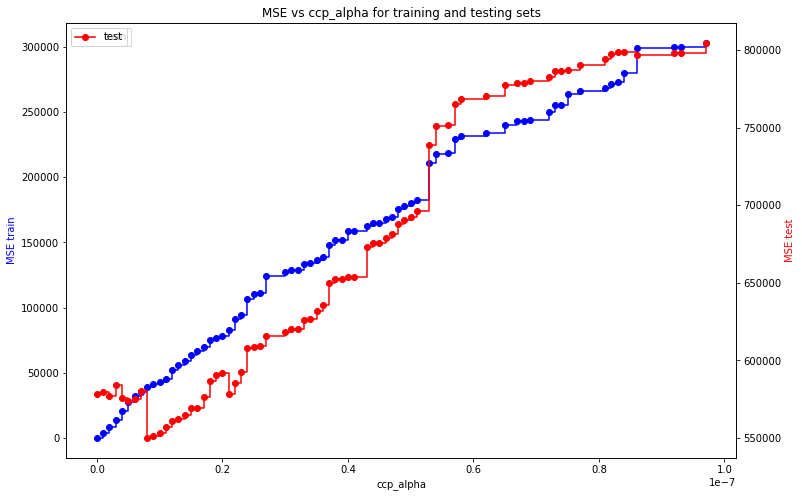

In [59]:
fig, ax1 = plt.subplots(figsize=(12,8))


ax1.set_xlabel("ccp_alpha")
ax1.set_ylabel("MSE train",color='blue')
ax1.set_title("MSE vs ccp_alpha for training and testing sets")
ax1.plot(ccp_alphas_4, train_MSE, marker="o", color='blue',label="train", drawstyle="steps-post")
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel("MSE test",color='red')

ax2.plot(ccp_alphas_4, test_MSE, marker="o", color='red',label="test", drawstyle="steps-post")
ax2.legend()
plt.show()

A complexity parameter of around $0.1 * 10^{-7}$ seems appropriate